In [1]:
library(ggplot2)
library(dplyr)
library(arrow)


Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘arrow’ was built under R version 4.2.3”

Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




In [2]:
# path to the anova data
anova_df_path <- file.path("..","..","data","6.analysis_results","anova_results.parquet")
data_path <- file.path("..","..","data","5.converted_data","normalized_feature_selected_output.parquet")

# read the data
data_df <- arrow::read_parquet(data_path)
head(data_df)

# read the anova data
anova_df <- arrow::read_parquet(anova_df_path)
head(anova_df)

Metadata_ImageNumber,Metadata_Image_FileName_OP,Metadata_ObjectNumber,Metadata_ConvertImageToObjects_Number_Object_Number,Metadata_ConvertImageToObjects_AreaShape_BoundingBoxArea,Metadata_ConvertImageToObjects_AreaShape_BoundingBoxMaximum_X,Metadata_ConvertImageToObjects_AreaShape_BoundingBoxMaximum_Y,Metadata_ConvertImageToObjects_AreaShape_BoundingBoxMinimum_X,Metadata_ConvertImageToObjects_AreaShape_BoundingBoxMinimum_Y,Metadata_ConvertImageToObjects_Location_CenterMassIntensity_X_OP,⋯,Texture_SumEntropy_OP_3_02_256,Texture_SumEntropy_OP_3_03_256,Texture_SumVariance_OP_3_00_256,Texture_SumVariance_OP_3_01_256,Texture_SumVariance_OP_3_02_256,Texture_SumVariance_OP_3_03_256,Texture_Variance_OP_3_00_256,Texture_Variance_OP_3_01_256,Texture_Variance_OP_3_02_256,Texture_Variance_OP_3_03_256
<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MAX_high_10_L.tiff,1,1,38250,269,182,44,12,131.5461,⋯,0.8414748,0.8345736,1.14918564,1.1522001,1.07890507,1.14484796,1.04000878,1.02573996,1.04549223,1.02761705
2,MAX_high_10_R.tiff,1,1,34170,208,245,38,44,106.9621,⋯,0.4524796,0.4361385,0.11217819,0.1319819,0.10860250,0.12569959,0.07571690,0.07120688,0.07647711,0.06792193
3,MAX_high_11_L.tiff,1,1,41736,250,267,62,45,131.3598,⋯,0.4948130,0.4908441,-0.01613966,0.0010415,-0.02199706,-0.02099207,-0.03393425,-0.04263493,-0.03498345,-0.03876252
4,MAX_high_11_R.tiff,1,1,43616,212,272,24,40,101.0699,⋯,0.8787288,0.8656168,1.12090459,1.1406044,1.07452904,1.11794134,1.03158516,1.01517198,1.03514983,1.01918842
5,MAX_high_12_L.tiff,2,2,25894,283,155,69,34,164.5791,⋯,0.4767676,0.4826737,0.17788587,0.1479330,0.10331342,0.15645695,0.11176513,0.10784585,0.11761376,0.10885888
6,MAX_high_12_R.tiff,1,1,40920,229,265,43,45,119.3891,⋯,0.1422418,0.1351928,-0.28744321,-0.2676854,-0.30011318,-0.29231741,-0.31932910,-0.32658057,-0.31978483,-0.32240245


group1,group2,meandiff,p-adj,lower,upper,reject,feature,anova_p_value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>
high_both,unsel_both,0.4620,0.8397,-0.6587,1.5827,FALSE,AreaShape_Area,1.655652e-35
high_both,unsel_br,-2.0857,0.0000,-2.5070,-1.6644,TRUE,AreaShape_Area,1.655652e-35
high_both,unsel_op,-1.2490,0.0000,-1.6703,-0.8276,TRUE,AreaShape_Area,1.655652e-35
high_both,wt_br,-2.2954,0.0000,-2.7047,-1.8862,TRUE,AreaShape_Area,1.655652e-35
high_both,wt_op,-1.7362,0.0000,-2.1454,-1.3270,TRUE,AreaShape_Area,1.655652e-35
unsel_both,unsel_br,-2.5477,0.0000,-3.6729,-1.4225,TRUE,AreaShape_Area,1.655652e-35


In [3]:
# make a new column for the group1 and group2
anova_df$comparison <- paste(anova_df$group1, anova_df$group2, sep = " - ")

# order the results by anova p-value
anova_df <- anova_df %>% arrange(anova_p_value)
head(anova_df)
features <- unique(anova_df$feature)[1:10]
features

group1,group2,meandiff,p-adj,lower,upper,reject,feature,anova_p_value,comparison
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<chr>
high_both,unsel_both,1.1812,0.0161,0.1416,2.2208,TRUE,AreaShape_ConvexArea,1.024444e-39,high_both - unsel_both
high_both,unsel_br,-2.0265,0.0000,-2.4173,-1.6356,TRUE,AreaShape_ConvexArea,1.024444e-39,high_both - unsel_br
high_both,unsel_op,-1.1872,0.0000,-1.5781,-0.7964,TRUE,AreaShape_ConvexArea,1.024444e-39,high_both - unsel_op
high_both,wt_br,-2.3143,0.0000,-2.6939,-1.9347,TRUE,AreaShape_ConvexArea,1.024444e-39,high_both - wt_br
high_both,wt_op,-1.6743,0.0000,-2.0539,-1.2947,TRUE,AreaShape_ConvexArea,1.024444e-39,high_both - wt_op
unsel_both,unsel_br,-3.2077,0.0000,-4.2514,-2.1639,TRUE,AreaShape_ConvexArea,1.024444e-39,unsel_both - unsel_br


[1] "AreaShape_ConvexArea"         "AreaShape_MinFeretDiameter"  
 [3] "AreaShape_MinorAxisLength"    "AreaShape_Zernike_0_0"       
 [5] "AreaShape_Area"               "AreaShape_CentralMoment_0_0" 
 [7] "AreaShape_SpatialMoment_0_0"  "AreaShape_EquivalentDiameter"
 [9] "AreaShape_MedianRadius"       "AreaShape_Zernike_2_0"

In [4]:
top_10_anova_df <- anova_df %>% filter(feature %in% features)
top_10_anova_df$log10_anova_p_value <- -log10(top_10_anova_df$`p-adj`)

In [5]:
head(top_10_anova_df)
unique(top_10_anova_df$feature)

group1,group2,meandiff,p-adj,lower,upper,reject,feature,anova_p_value,comparison,log10_anova_p_value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<chr>,<dbl>
high_both,unsel_both,1.1812,0.0161,0.1416,2.2208,TRUE,AreaShape_ConvexArea,1.024444e-39,high_both - unsel_both,1.793174
high_both,unsel_br,-2.0265,0.0000,-2.4173,-1.6356,TRUE,AreaShape_ConvexArea,1.024444e-39,high_both - unsel_br,Inf
high_both,unsel_op,-1.1872,0.0000,-1.5781,-0.7964,TRUE,AreaShape_ConvexArea,1.024444e-39,high_both - unsel_op,Inf
high_both,wt_br,-2.3143,0.0000,-2.6939,-1.9347,TRUE,AreaShape_ConvexArea,1.024444e-39,high_both - wt_br,Inf
high_both,wt_op,-1.6743,0.0000,-2.0539,-1.2947,TRUE,AreaShape_ConvexArea,1.024444e-39,high_both - wt_op,Inf
unsel_both,unsel_br,-3.2077,0.0000,-4.2514,-2.1639,TRUE,AreaShape_ConvexArea,1.024444e-39,unsel_both - unsel_br,Inf


[1] "AreaShape_ConvexArea"         "AreaShape_MinFeretDiameter"  
 [3] "AreaShape_MinorAxisLength"    "AreaShape_Zernike_0_0"       
 [5] "AreaShape_Area"               "AreaShape_CentralMoment_0_0" 
 [7] "AreaShape_SpatialMoment_0_0"  "AreaShape_EquivalentDiameter"
 [9] "AreaShape_MedianRadius"       "AreaShape_Zernike_2_0"

In [6]:
# plot the variability of the top 10 features
features
# tmp <- data_df %>% select(c("Metadata_unique", features[1]))
# head(tmp)
data_df$Metadata_unique <- paste0(data_df$Metadata_genotype, "_", data_df$Metadata_identity, "_", data_df$Metadata_side)
head(data_df,2)

[1] "AreaShape_ConvexArea"         "AreaShape_MinFeretDiameter"  
 [3] "AreaShape_MinorAxisLength"    "AreaShape_Zernike_0_0"       
 [5] "AreaShape_Area"               "AreaShape_CentralMoment_0_0" 
 [7] "AreaShape_SpatialMoment_0_0"  "AreaShape_EquivalentDiameter"
 [9] "AreaShape_MedianRadius"       "AreaShape_Zernike_2_0"

Metadata_ImageNumber,Metadata_Image_FileName_OP,Metadata_ObjectNumber,Metadata_ConvertImageToObjects_Number_Object_Number,Metadata_ConvertImageToObjects_AreaShape_BoundingBoxArea,Metadata_ConvertImageToObjects_AreaShape_BoundingBoxMaximum_X,Metadata_ConvertImageToObjects_AreaShape_BoundingBoxMaximum_Y,Metadata_ConvertImageToObjects_AreaShape_BoundingBoxMinimum_X,Metadata_ConvertImageToObjects_AreaShape_BoundingBoxMinimum_Y,Metadata_ConvertImageToObjects_Location_CenterMassIntensity_X_OP,⋯,Texture_SumEntropy_OP_3_03_256,Texture_SumVariance_OP_3_00_256,Texture_SumVariance_OP_3_01_256,Texture_SumVariance_OP_3_02_256,Texture_SumVariance_OP_3_03_256,Texture_Variance_OP_3_00_256,Texture_Variance_OP_3_01_256,Texture_Variance_OP_3_02_256,Texture_Variance_OP_3_03_256,Metadata_unique
<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,MAX_high_10_L.tiff,1,1,38250,269,182,44,12,131.5461,⋯,0.8345736,1.1491856,1.1522001,1.0789051,1.1448480,1.0400088,1.02573996,1.04549223,1.02761705,high_both_L
2,MAX_high_10_R.tiff,1,1,34170,208,245,38,44,106.9621,⋯,0.4361385,0.1121782,0.1319819,0.1086025,0.1256996,0.0757169,0.07120688,0.07647711,0.06792193,high_both_R


[1] "AreaShape_ConvexArea"


`summarise()` has grouped output by 'Metadata_genotype'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Metadata_genotype', 'Metadata_side'. You
can override using the `.groups` argument.


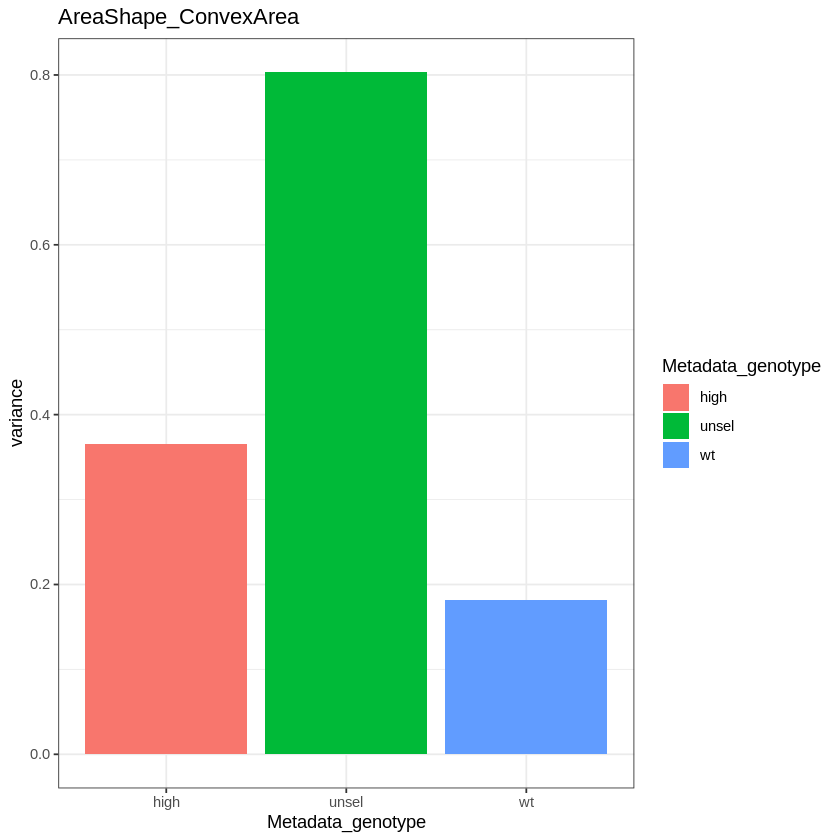

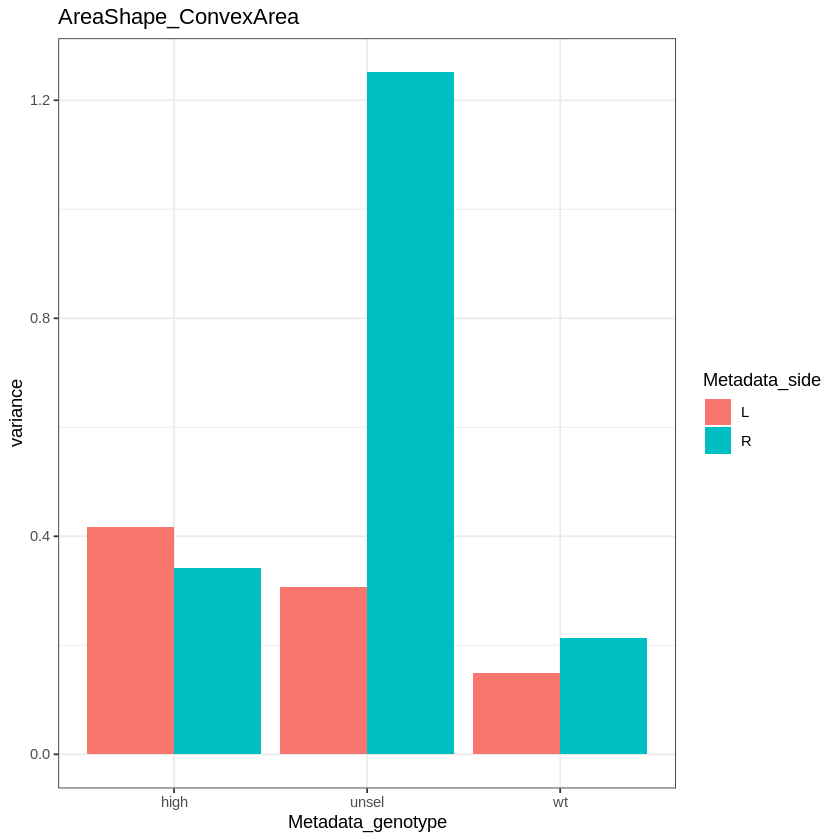

[1] "AreaShape_MinFeretDiameter"


`summarise()` has grouped output by 'Metadata_genotype'. You can override using
the `.groups` argument.


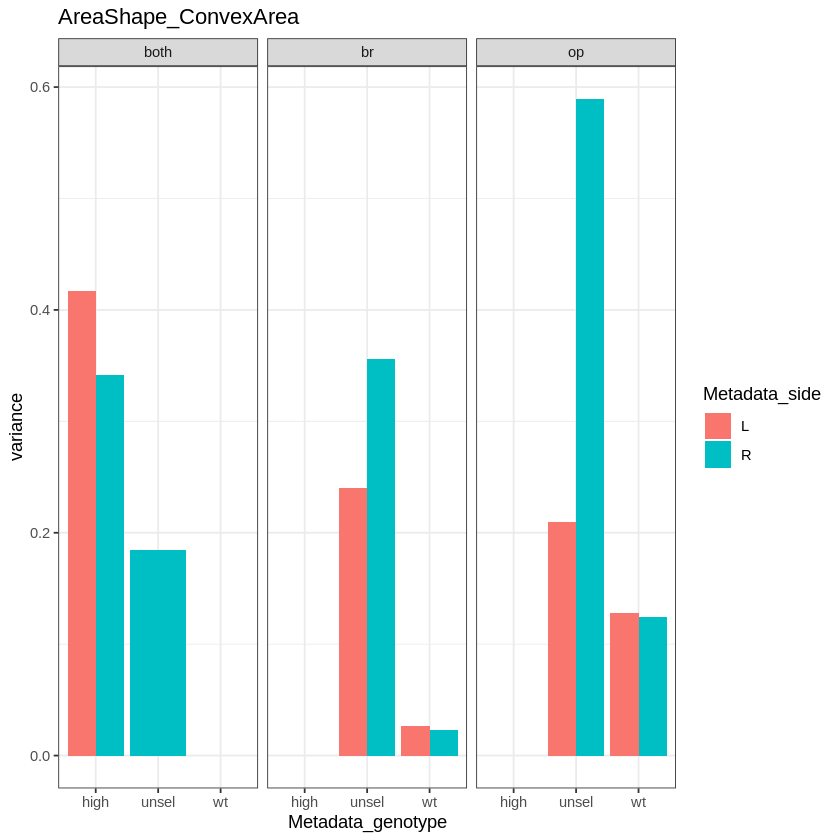

`summarise()` has grouped output by 'Metadata_genotype', 'Metadata_side'. You
can override using the `.groups` argument.


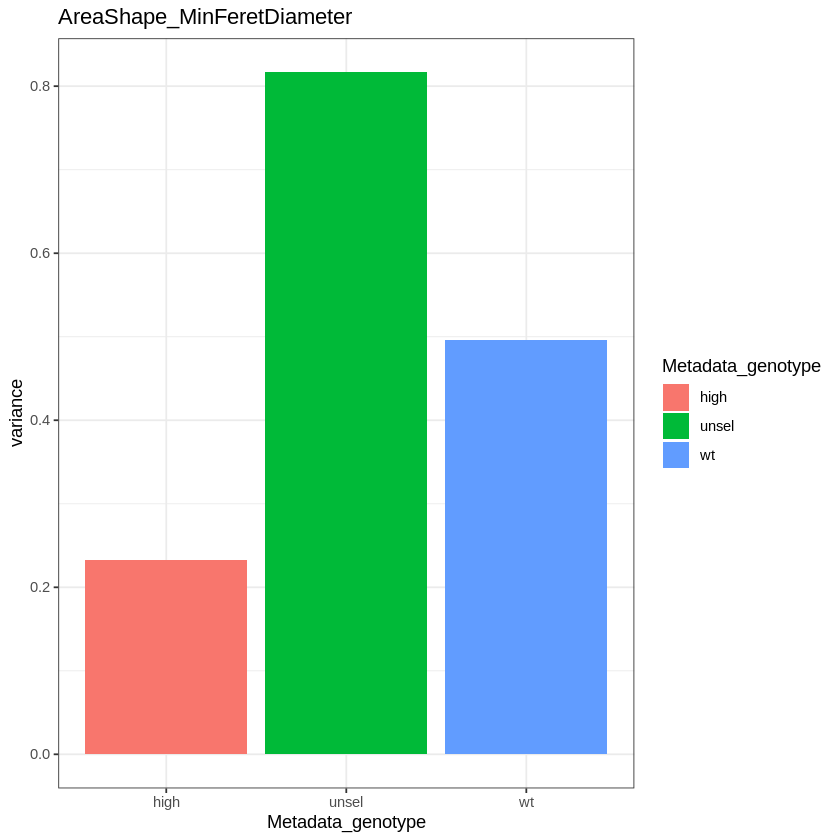

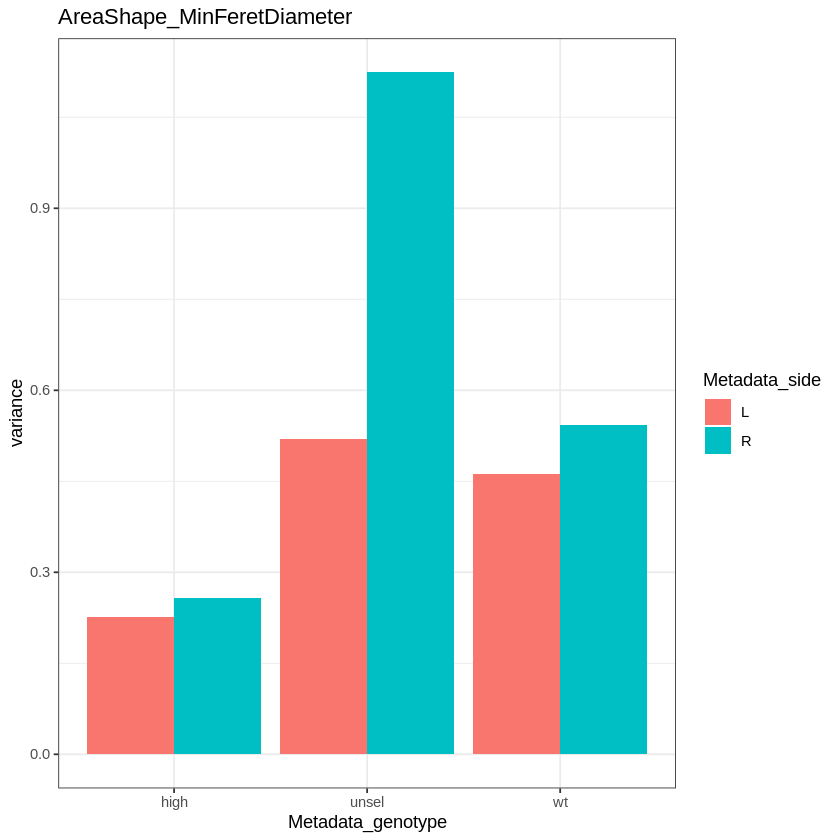

[1] "AreaShape_MinorAxisLength"


`summarise()` has grouped output by 'Metadata_genotype'. You can override using
the `.groups` argument.


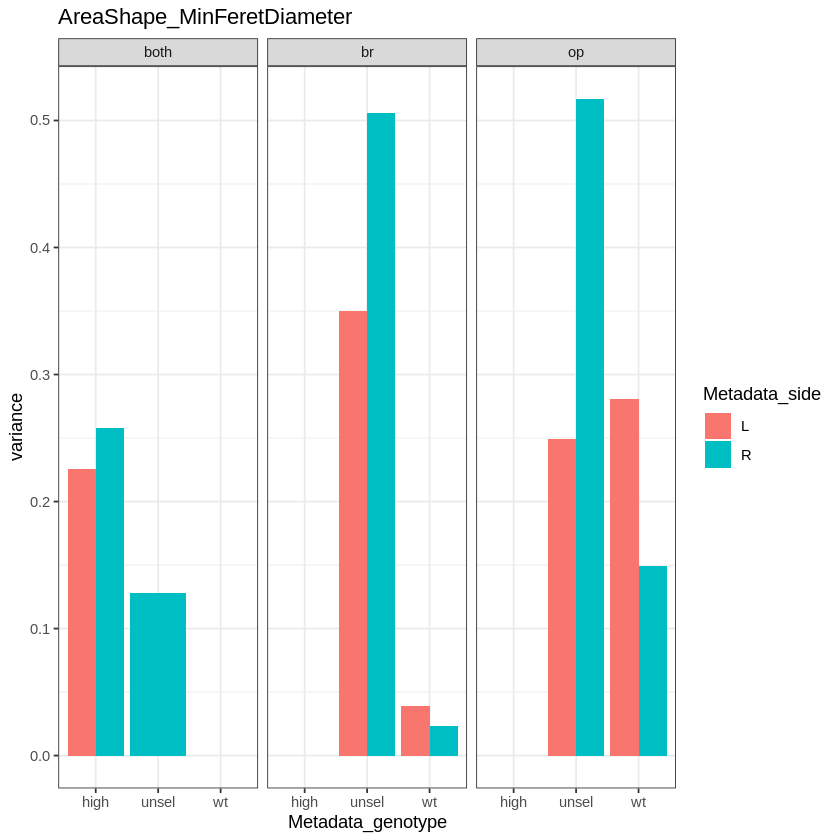

`summarise()` has grouped output by 'Metadata_genotype', 'Metadata_side'. You
can override using the `.groups` argument.


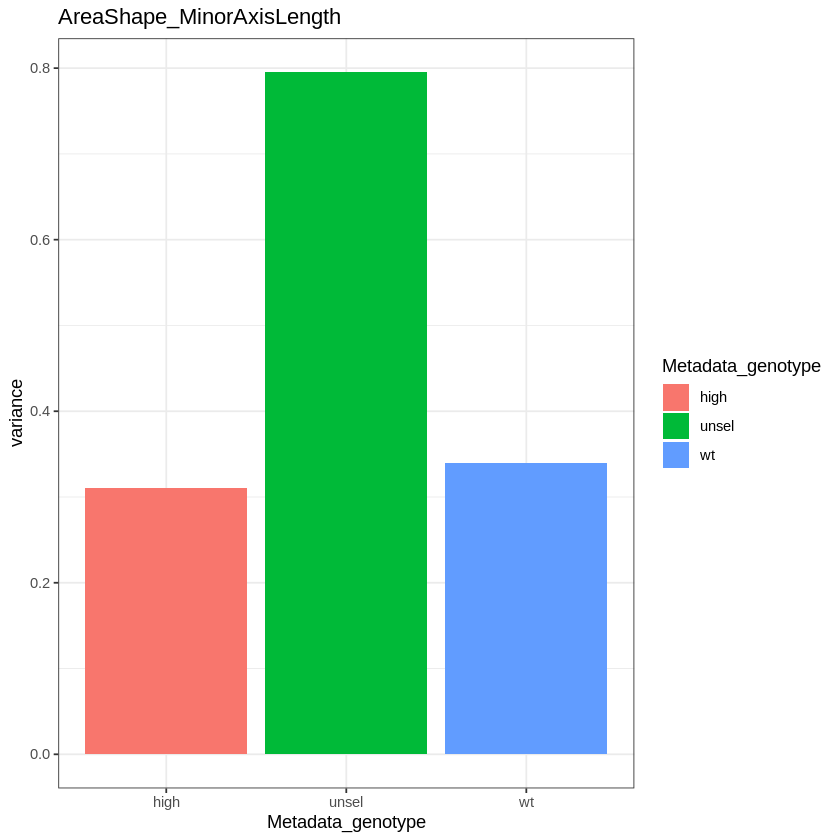

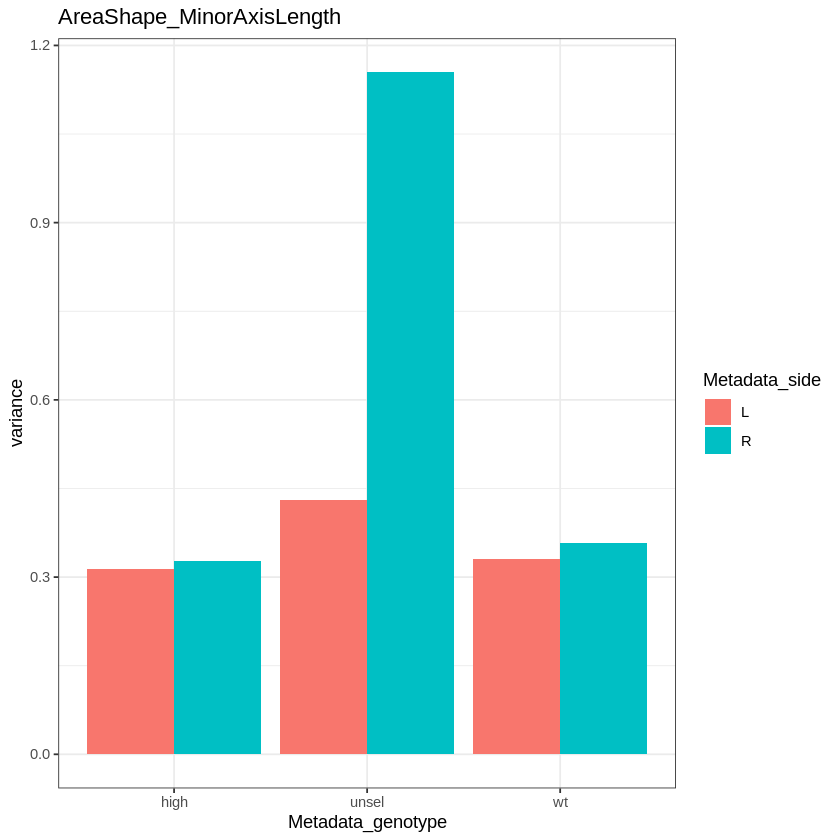

[1] "AreaShape_Zernike_0_0"


`summarise()` has grouped output by 'Metadata_genotype'. You can override using
the `.groups` argument.


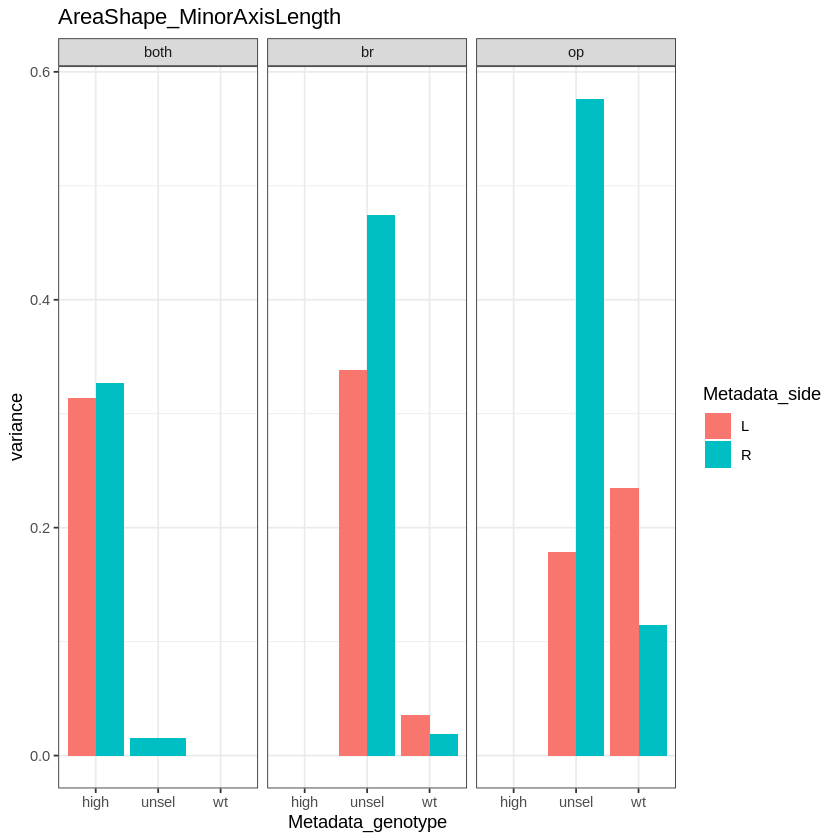

`summarise()` has grouped output by 'Metadata_genotype', 'Metadata_side'. You
can override using the `.groups` argument.


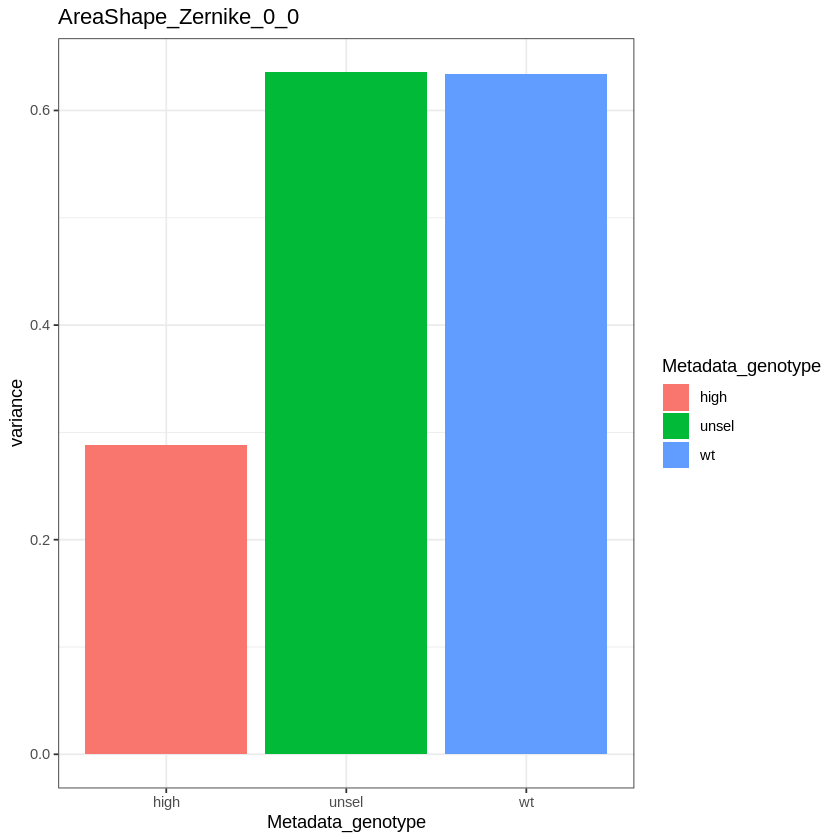

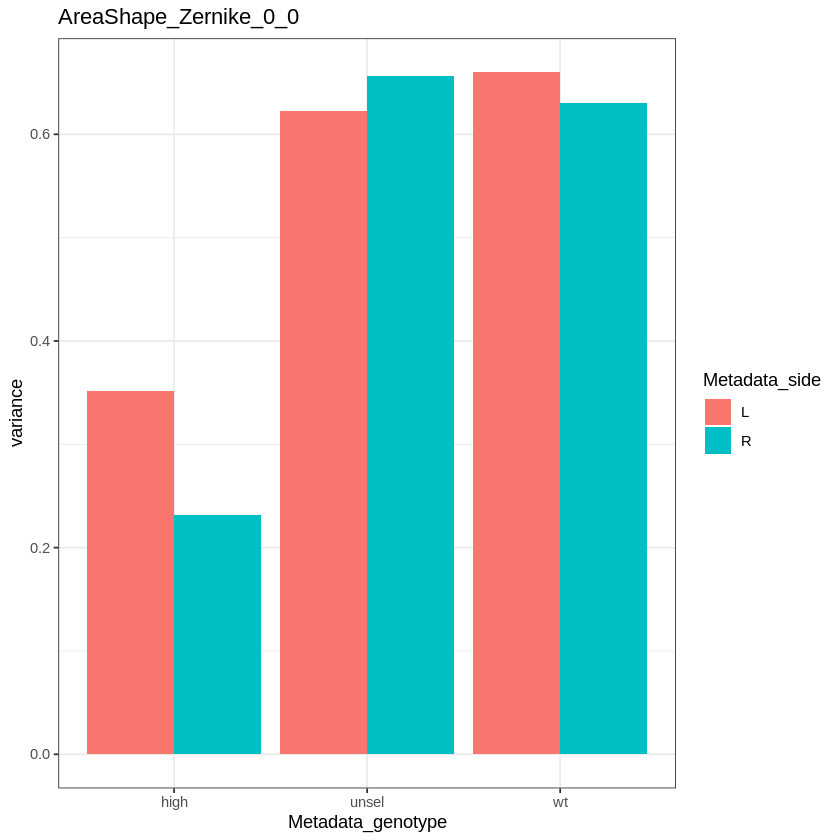

[1] "AreaShape_Area"


`summarise()` has grouped output by 'Metadata_genotype'. You can override using
the `.groups` argument.


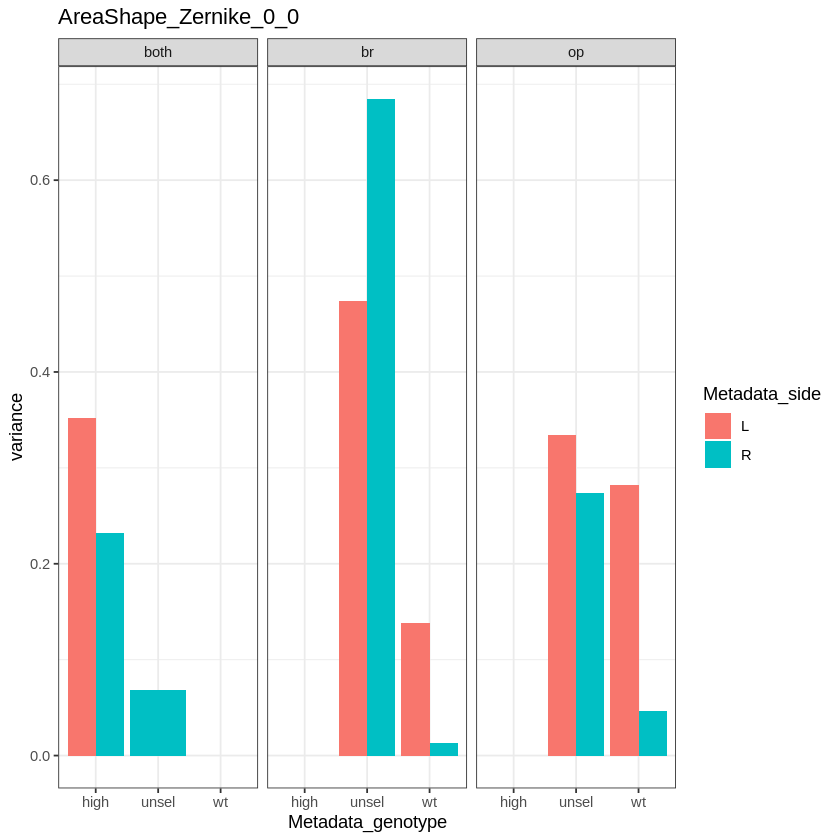

`summarise()` has grouped output by 'Metadata_genotype', 'Metadata_side'. You
can override using the `.groups` argument.


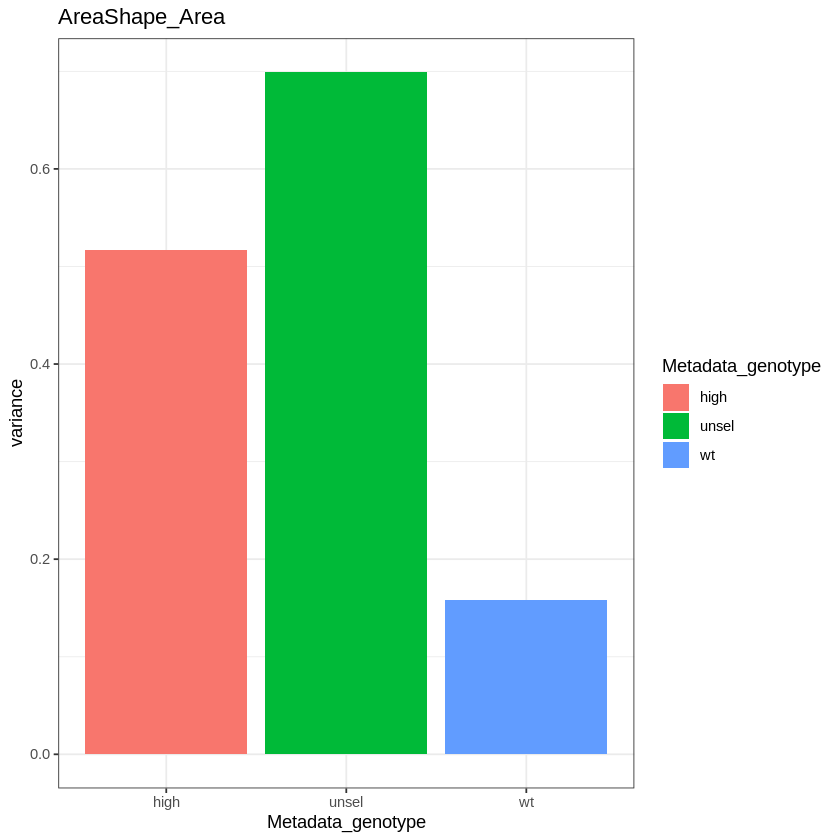

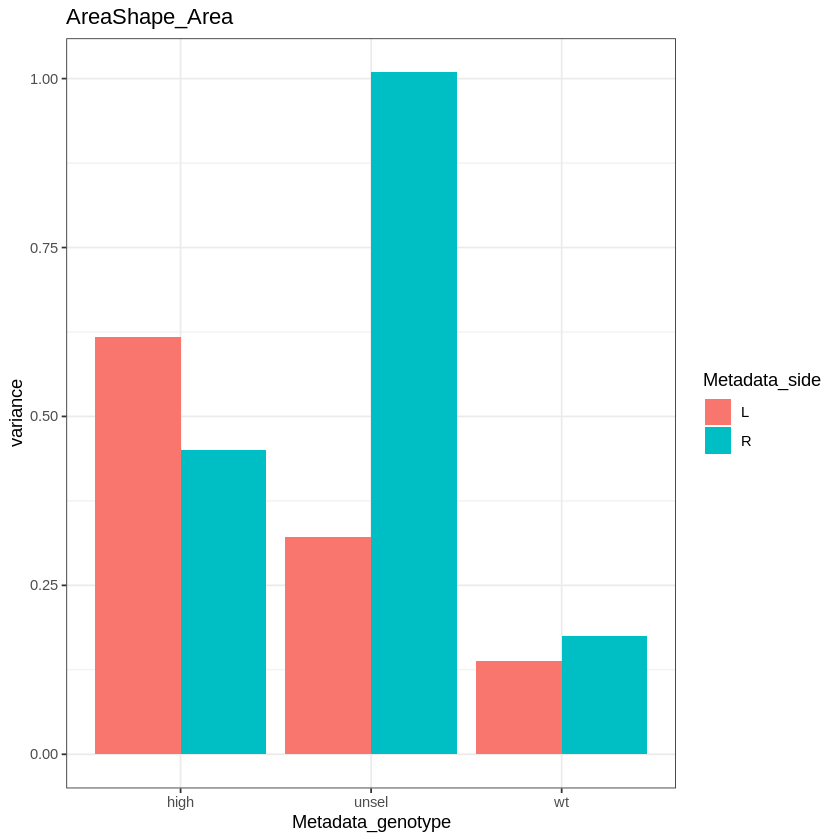

[1] "AreaShape_CentralMoment_0_0"


`summarise()` has grouped output by 'Metadata_genotype'. You can override using
the `.groups` argument.


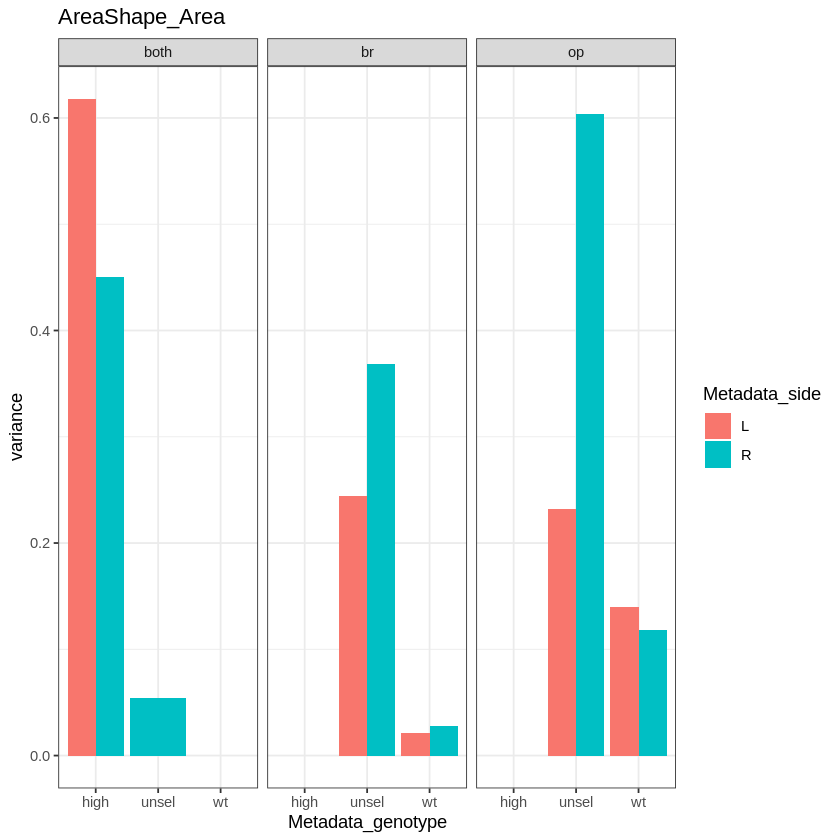

`summarise()` has grouped output by 'Metadata_genotype', 'Metadata_side'. You
can override using the `.groups` argument.


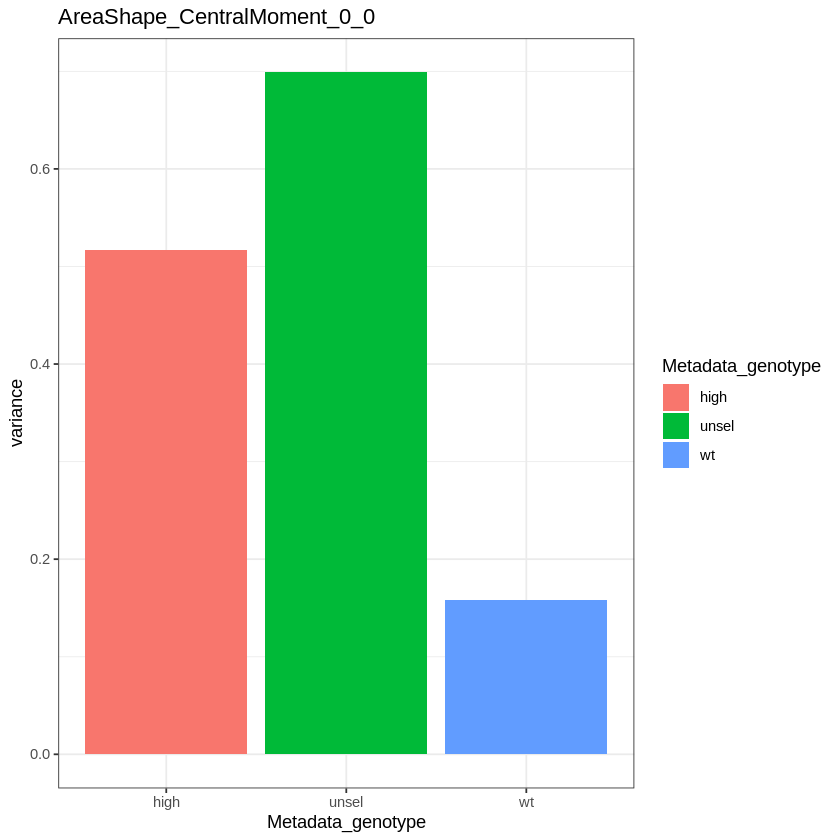

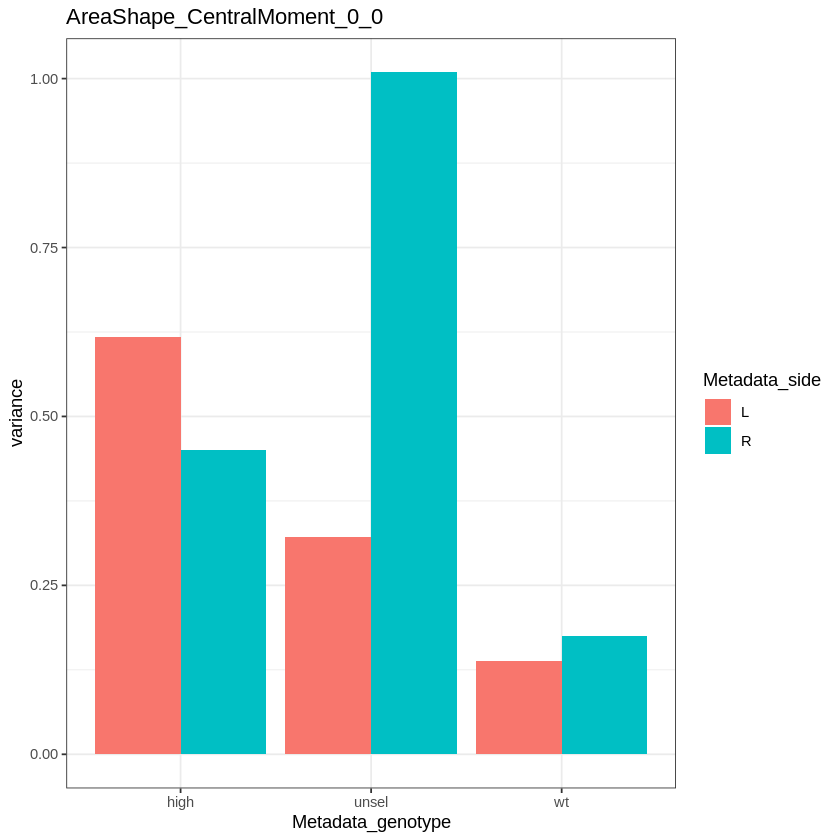

[1] "AreaShape_SpatialMoment_0_0"


`summarise()` has grouped output by 'Metadata_genotype'. You can override using
the `.groups` argument.


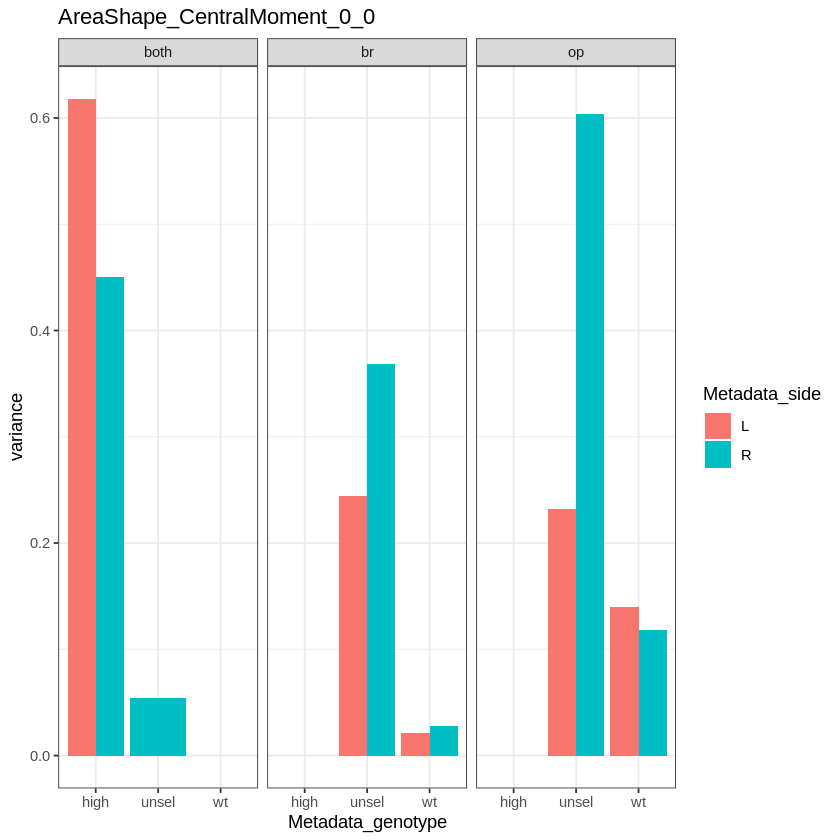

`summarise()` has grouped output by 'Metadata_genotype', 'Metadata_side'. You
can override using the `.groups` argument.


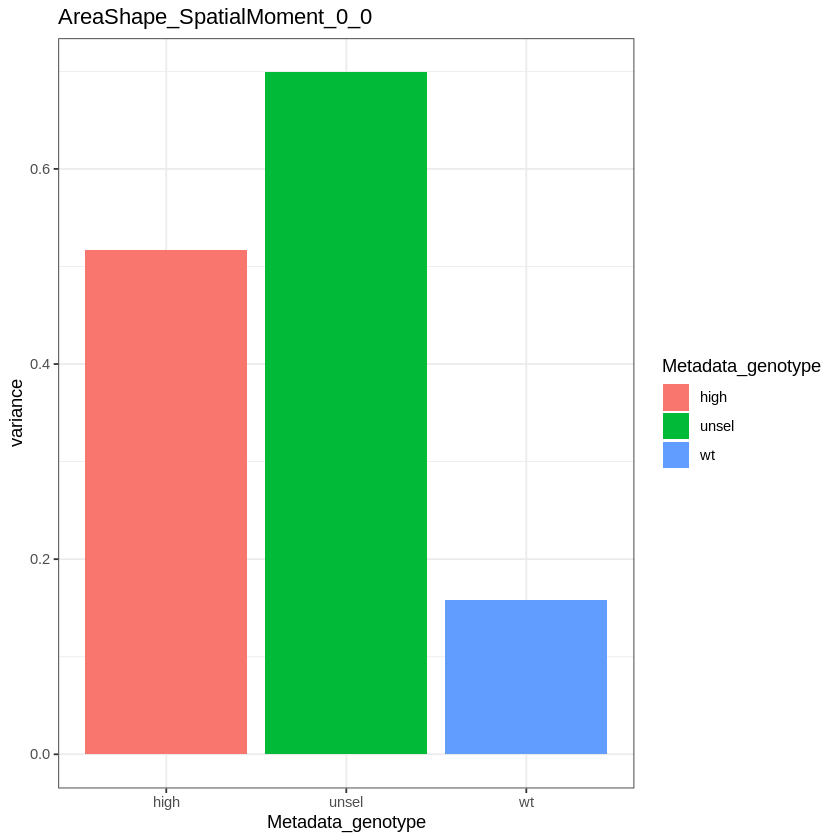

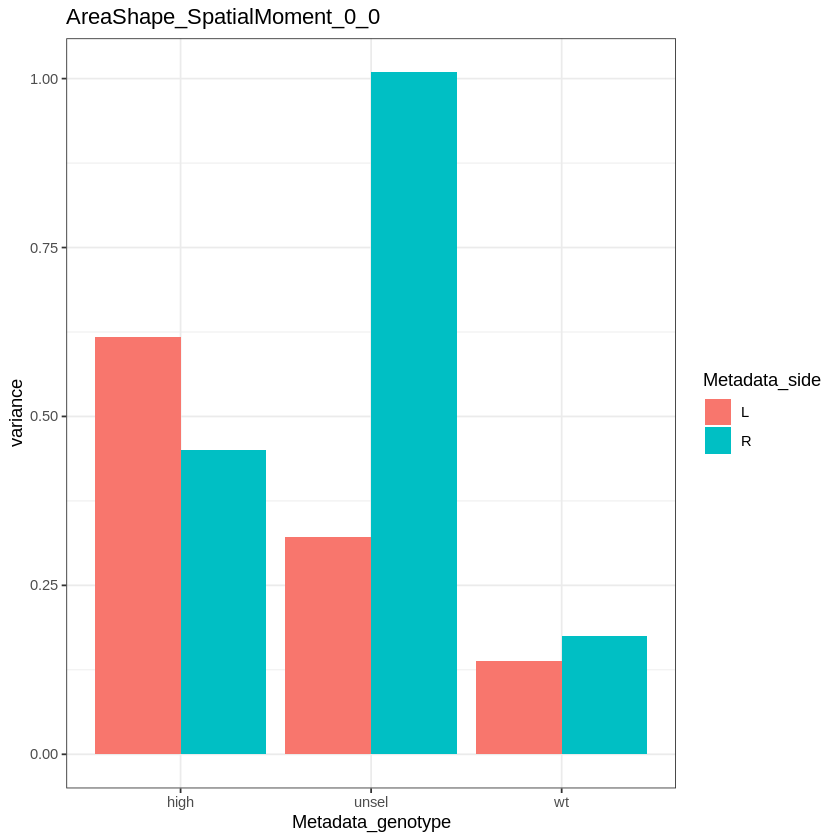

[1] "AreaShape_EquivalentDiameter"


`summarise()` has grouped output by 'Metadata_genotype'. You can override using
the `.groups` argument.


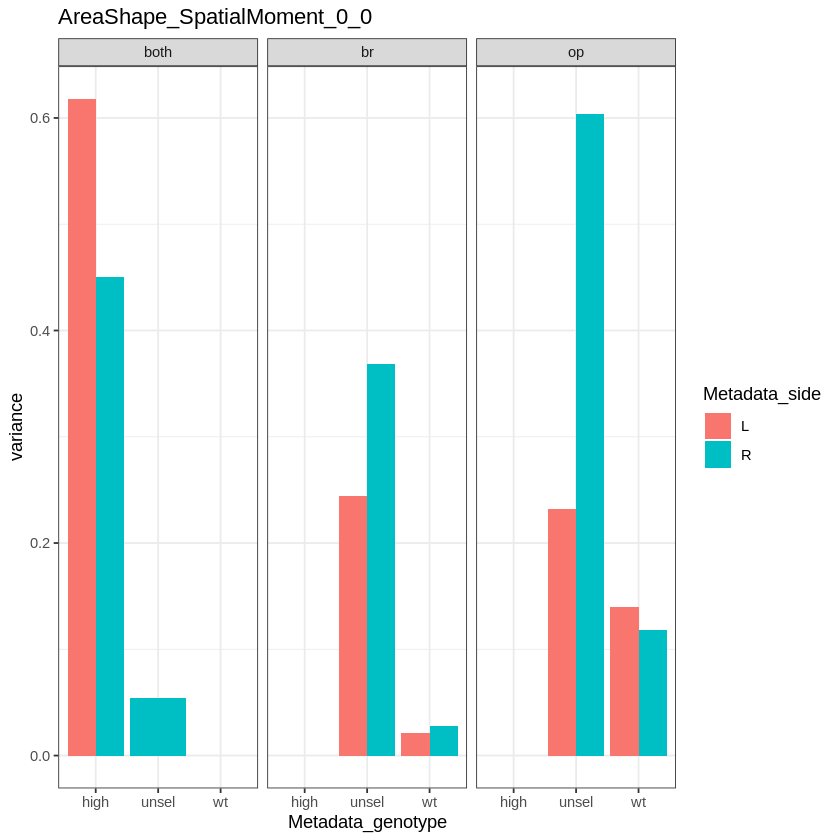

`summarise()` has grouped output by 'Metadata_genotype', 'Metadata_side'. You
can override using the `.groups` argument.


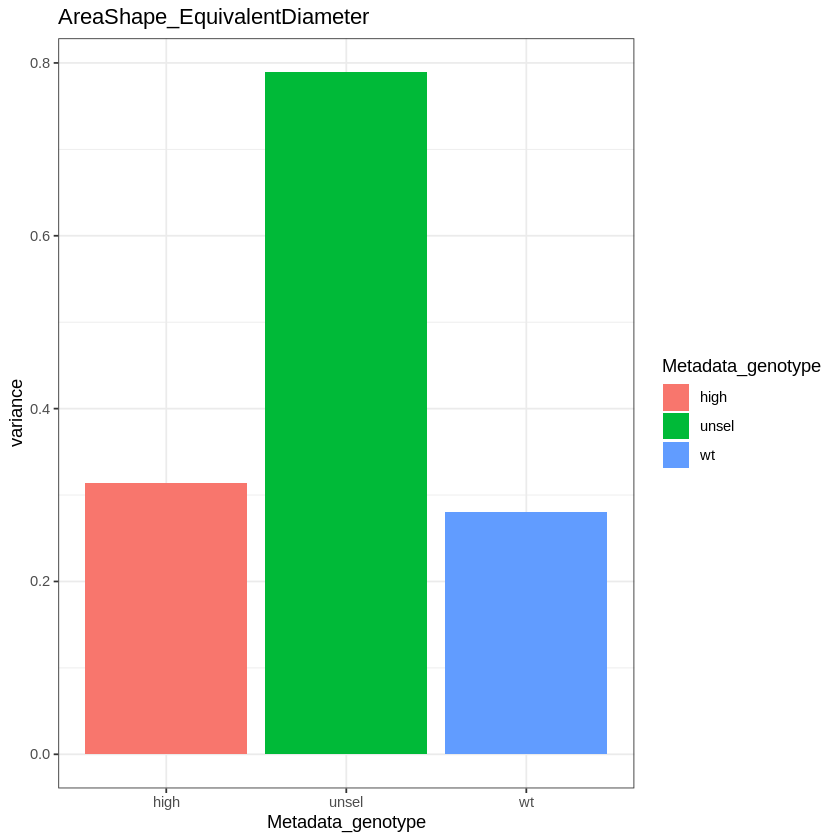

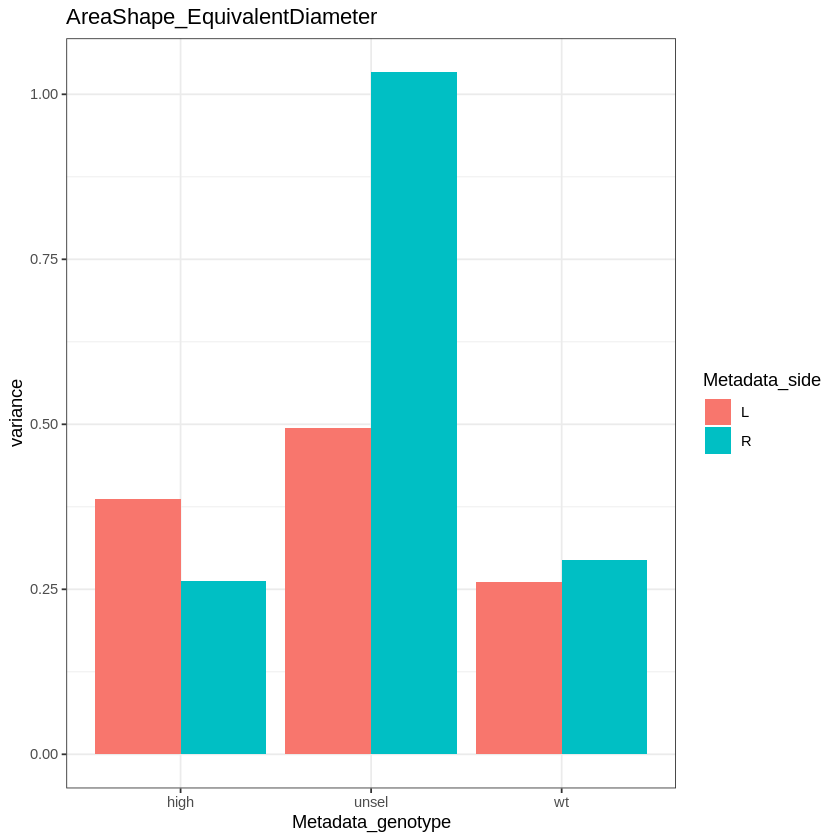

[1] "AreaShape_MedianRadius"


`summarise()` has grouped output by 'Metadata_genotype'. You can override using
the `.groups` argument.


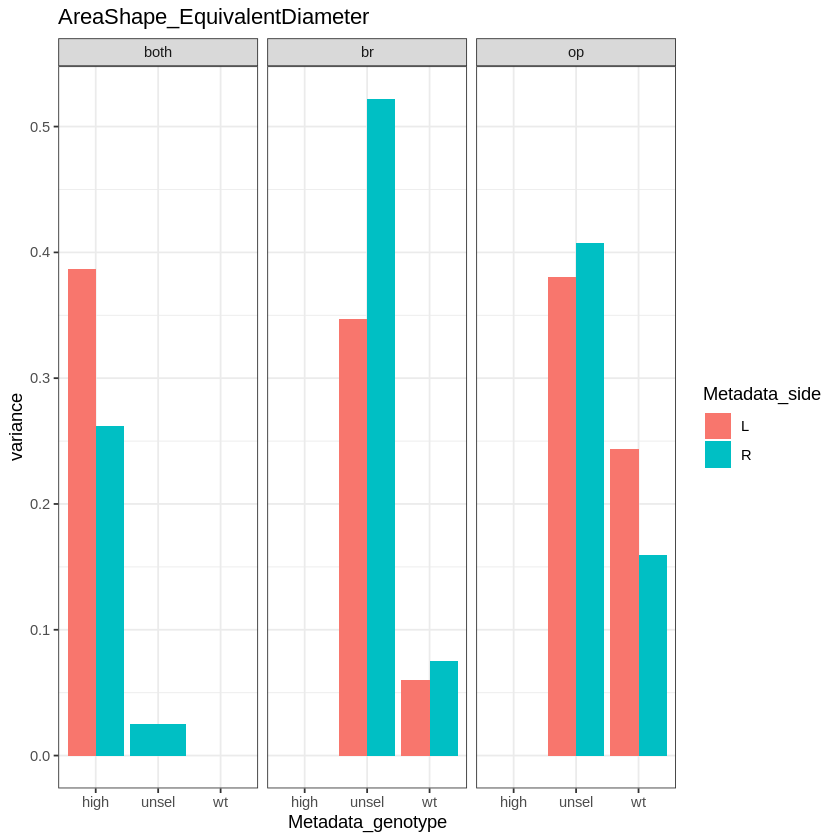

`summarise()` has grouped output by 'Metadata_genotype', 'Metadata_side'. You
can override using the `.groups` argument.


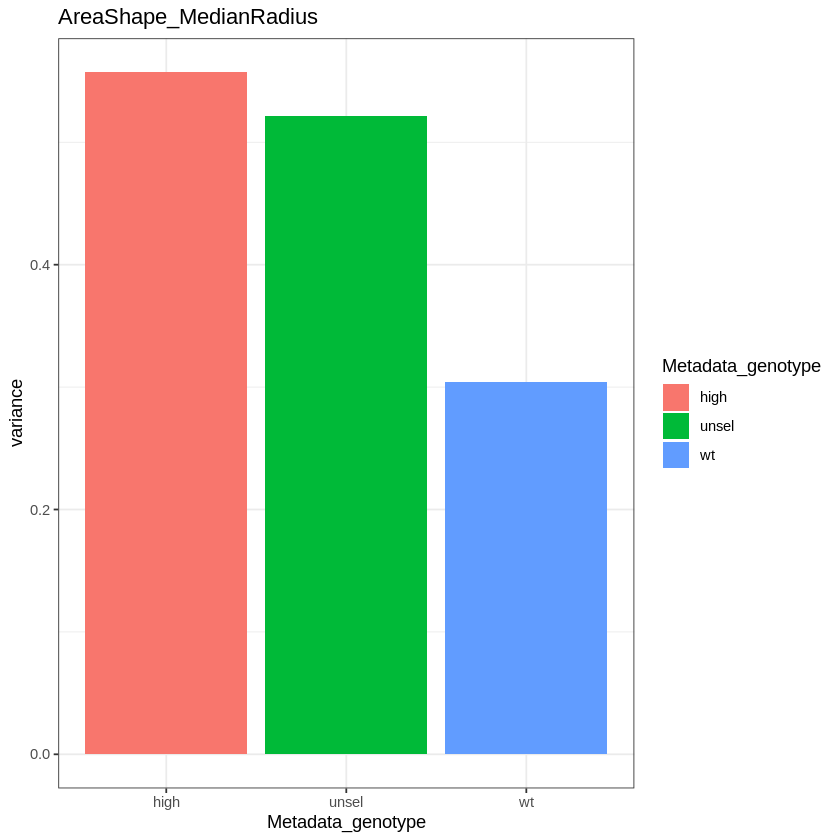

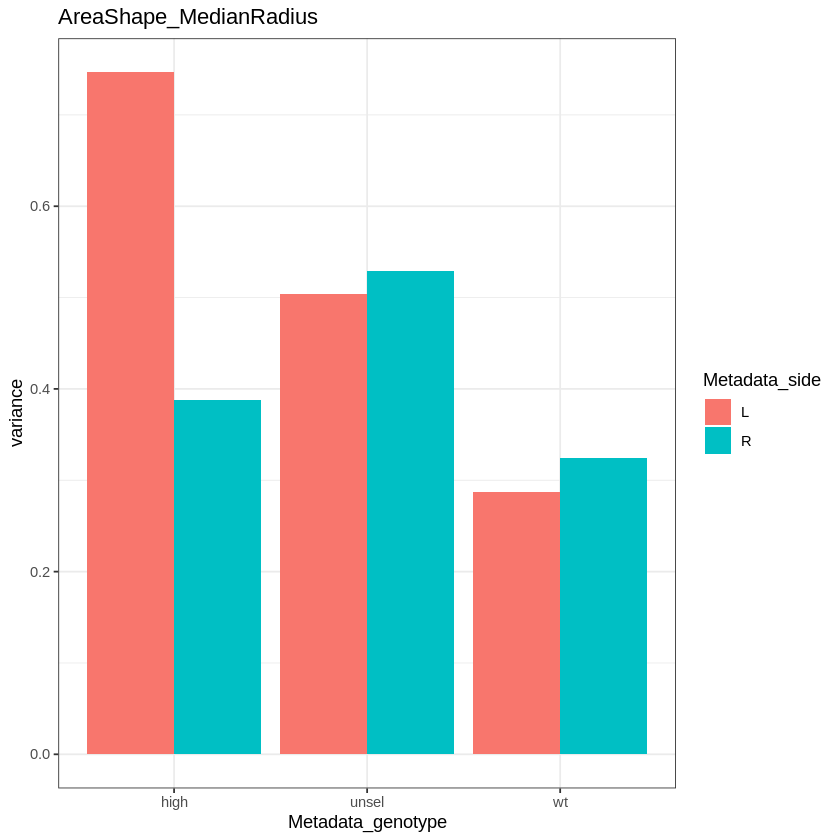

[1] "AreaShape_Zernike_2_0"


`summarise()` has grouped output by 'Metadata_genotype'. You can override using
the `.groups` argument.


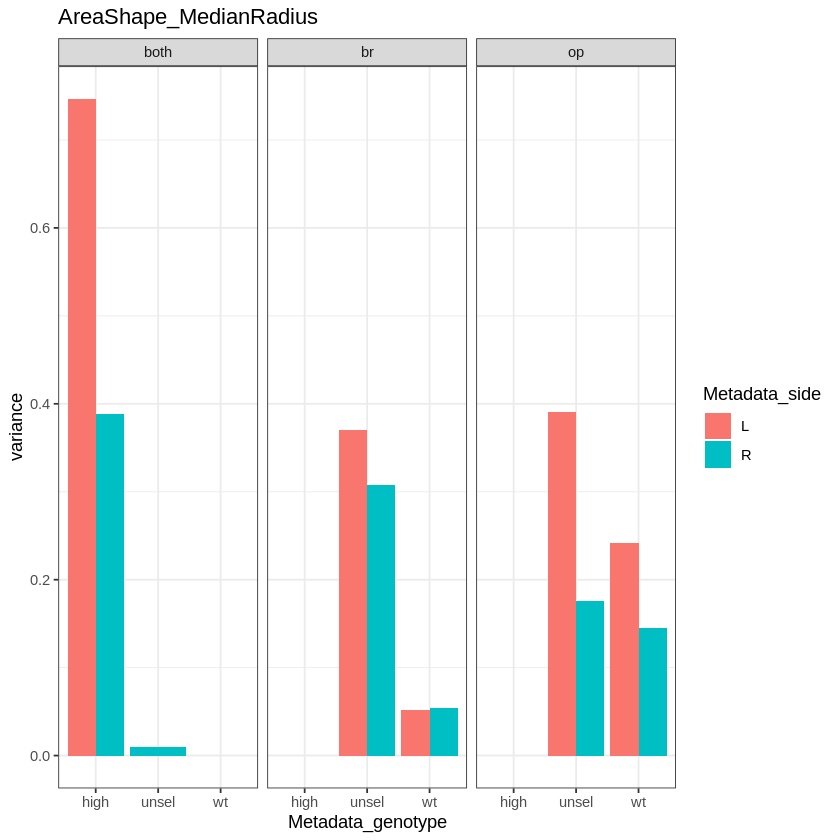

`summarise()` has grouped output by 'Metadata_genotype', 'Metadata_side'. You
can override using the `.groups` argument.


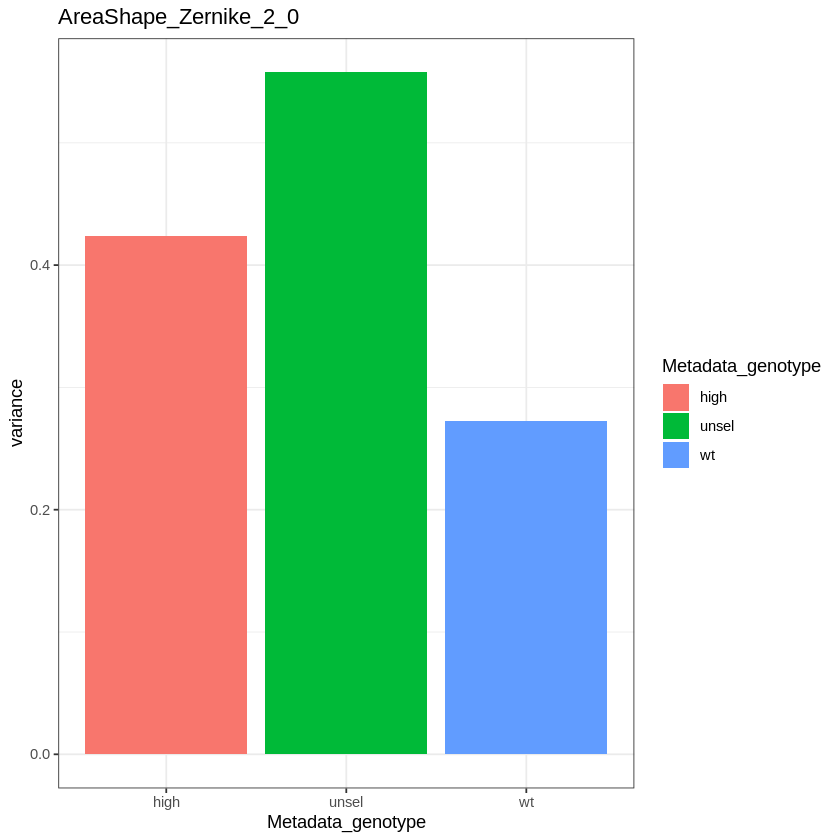

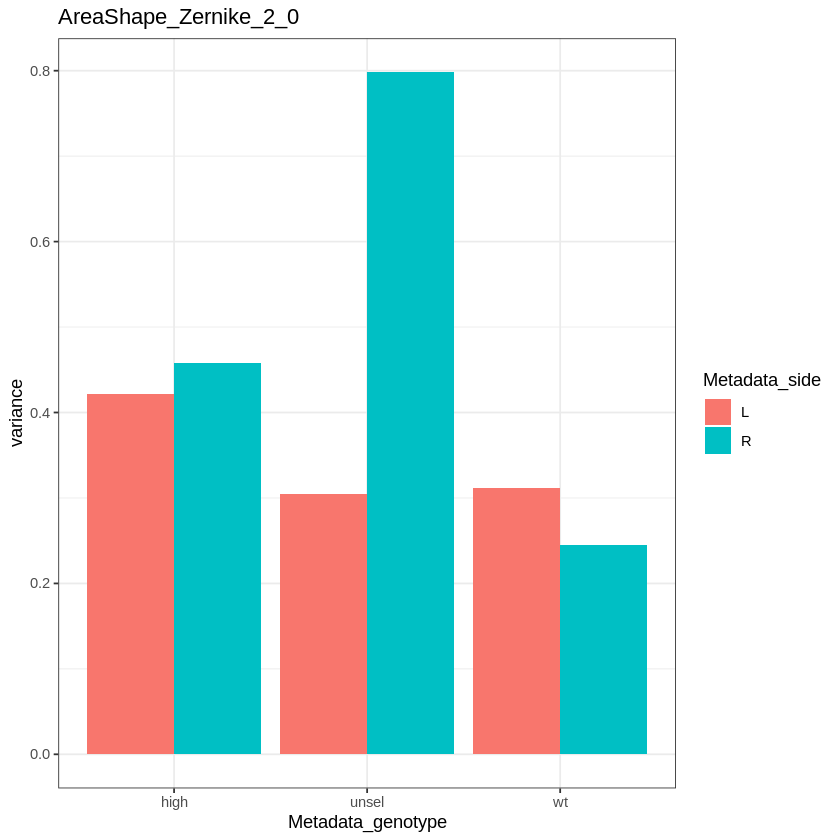

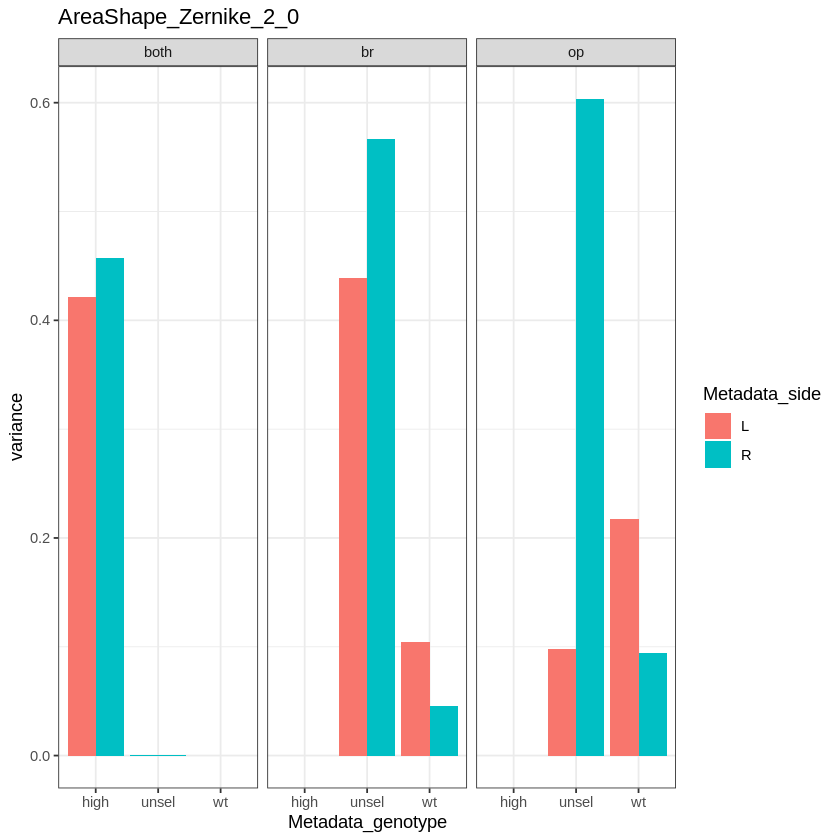

In [7]:
for (i in 1:length(features)){
    print(features[i])
    # get the top feature
    tmp <- data_df %>% select(c("Metadata_unique", "Metadata_genotype", "Metadata_identity", "Metadata_side", features[i]))
    # aggregate the data to get the mean and standard deviation of the top feature
    tmp <- tmp %>% group_by(Metadata_genotype) %>% summarise(mean = mean(!!as.name(features[i])), sd = sd(!!as.name(features[i])))
    # calculate the variance where variance = sd^2
    tmp$variance <- tmp$sd^2
    # plot the variability of the top feature
    var_plot <- (
        ggplot(tmp, aes(x = Metadata_genotype, y = variance, fill = Metadata_genotype)) 
        + geom_bar(stat = "identity")
        + theme(axis.text.x = element_text(angle = 90, hjust = 1))
        + labs(title = features[i])
        + theme_bw()
    )
    print(var_plot)
    # get the top feature
    tmp <- data_df %>% select(c("Metadata_unique", "Metadata_genotype", "Metadata_identity", "Metadata_side", features[i]))
    # aggregate the data to get the mean and standard deviation of the top feature
    tmp <- tmp %>% group_by(Metadata_genotype, Metadata_side) %>% summarise(mean = mean(!!as.name(features[i])), sd = sd(!!as.name(features[i])))
    # calculate the variance where variance = sd^2
    tmp$variance <- tmp$sd^2
    # plot the variability of the top feature
    var_plot <- (
        ggplot(tmp, aes(x = Metadata_genotype, y = variance, fill = Metadata_side)) 
        + geom_bar(stat = "identity", position = "dodge")
        + theme(axis.text.x = element_text(angle = 90, hjust = 1))
        + labs(title = features[i])
        + theme_bw()
    )
    print(var_plot)
    # get the top feature
    tmp <- data_df %>% select(c("Metadata_unique", "Metadata_genotype", "Metadata_identity", "Metadata_side", features[i]))
    # aggregate the data to get the mean and standard deviation of the top feature
    tmp <- tmp %>% group_by(Metadata_genotype, Metadata_side, Metadata_identity) %>% summarise(mean = mean(!!as.name(features[i])), sd = sd(!!as.name(features[i])))
    # calculate the variance where variance = sd^2
    tmp$variance <- tmp$sd^2
    # plot the variability of the top feature
    var_plot <- (
        ggplot(tmp, aes(x = Metadata_genotype, y = variance, fill = Metadata_side)) 
        + geom_bar(stat = "identity", position = "dodge")
        + theme(axis.text.x = element_text(angle = 90, hjust = 1))
        + labs(title = features[i])
        + theme_bw()
        + facet_grid(.~Metadata_identity)
    )
    print(var_plot)
}


In [8]:
features

[1] "AreaShape_ConvexArea"         "AreaShape_MinFeretDiameter"  
 [3] "AreaShape_MinorAxisLength"    "AreaShape_Zernike_0_0"       
 [5] "AreaShape_Area"               "AreaShape_CentralMoment_0_0" 
 [7] "AreaShape_SpatialMoment_0_0"  "AreaShape_EquivalentDiameter"
 [9] "AreaShape_MedianRadius"       "AreaShape_Zernike_2_0"

In [9]:
# # get the top feature
# tmp <- data_df %>% select(c("Metadata_unique", "Metadata_genotype", "Metadata_identity", "Metadata_side", features[1]))
# # aggregate the data to get the mean and standard deviation of the top feature
# tmp <- tmp %>% group_by(Metadata_genotype) %>% summarise(mean = mean(!!as.name(features[1])), sd = sd(!!as.name(features[1])))
# # calculate the variance where variance = sd^2
# tmp$variance <- tmp$sd^2
# # plot the variability of the top feature
# var_plot <- (
#     ggplot(tmp, aes(x = Metadata_genotype, y = variance, fill = Metadata_genotype)) 
#     + geom_bar(stat = "identity")
#     + theme(axis.text.x = element_text(angle = 90, hjust = 1))
#     + labs(title = features[1])
#     + theme_bw()
# )
# var_plot
# # get the top feature
# tmp <- data_df %>% select(c("Metadata_unique", "Metadata_genotype", "Metadata_identity", "Metadata_side", features[1]))
# # aggregate the data to get the mean and standard deviation of the top feature
# tmp <- tmp %>% group_by(Metadata_genotype, Metadata_side) %>% summarise(mean = mean(!!as.name(features[1])), sd = sd(!!as.name(features[1])))
# # calculate the variance where variance = sd^2
# tmp$variance <- tmp$sd^2
# # plot the variability of the top feature
# var_plot <- (
#     ggplot(tmp, aes(x = Metadata_genotype, y = variance, fill = Metadata_side)) 
#     + geom_bar(stat = "identity", position = "dodge")
#     + theme(axis.text.x = element_text(angle = 90, hjust = 1))
#     + labs(title = features[1])
#     + theme_bw()
# )
# var_plot
# # get the top feature
# tmp <- data_df %>% select(c("Metadata_unique", "Metadata_genotype", "Metadata_identity", "Metadata_side", features[1]))
# # aggregate the data to get the mean and standard deviation of the top feature
# tmp <- tmp %>% group_by(Metadata_genotype, Metadata_side, Metadata_identity) %>% summarise(mean = mean(!!as.name(features[1])), sd = sd(!!as.name(features[1])))
# # calculate the variance where variance = sd^2
# tmp$variance <- tmp$sd^2
# # plot the variability of the top feature
# var_plot <- (
#     ggplot(tmp, aes(x = Metadata_genotype, y = variance, fill = Metadata_side)) 
#     + geom_bar(stat = "identity", position = "dodge")
#     + theme(axis.text.x = element_text(angle = 90, hjust = 1))
#     + labs(title = features[1])
#     + theme_bw()
#     + facet_grid(.~Metadata_identity)
# )
# var_plot

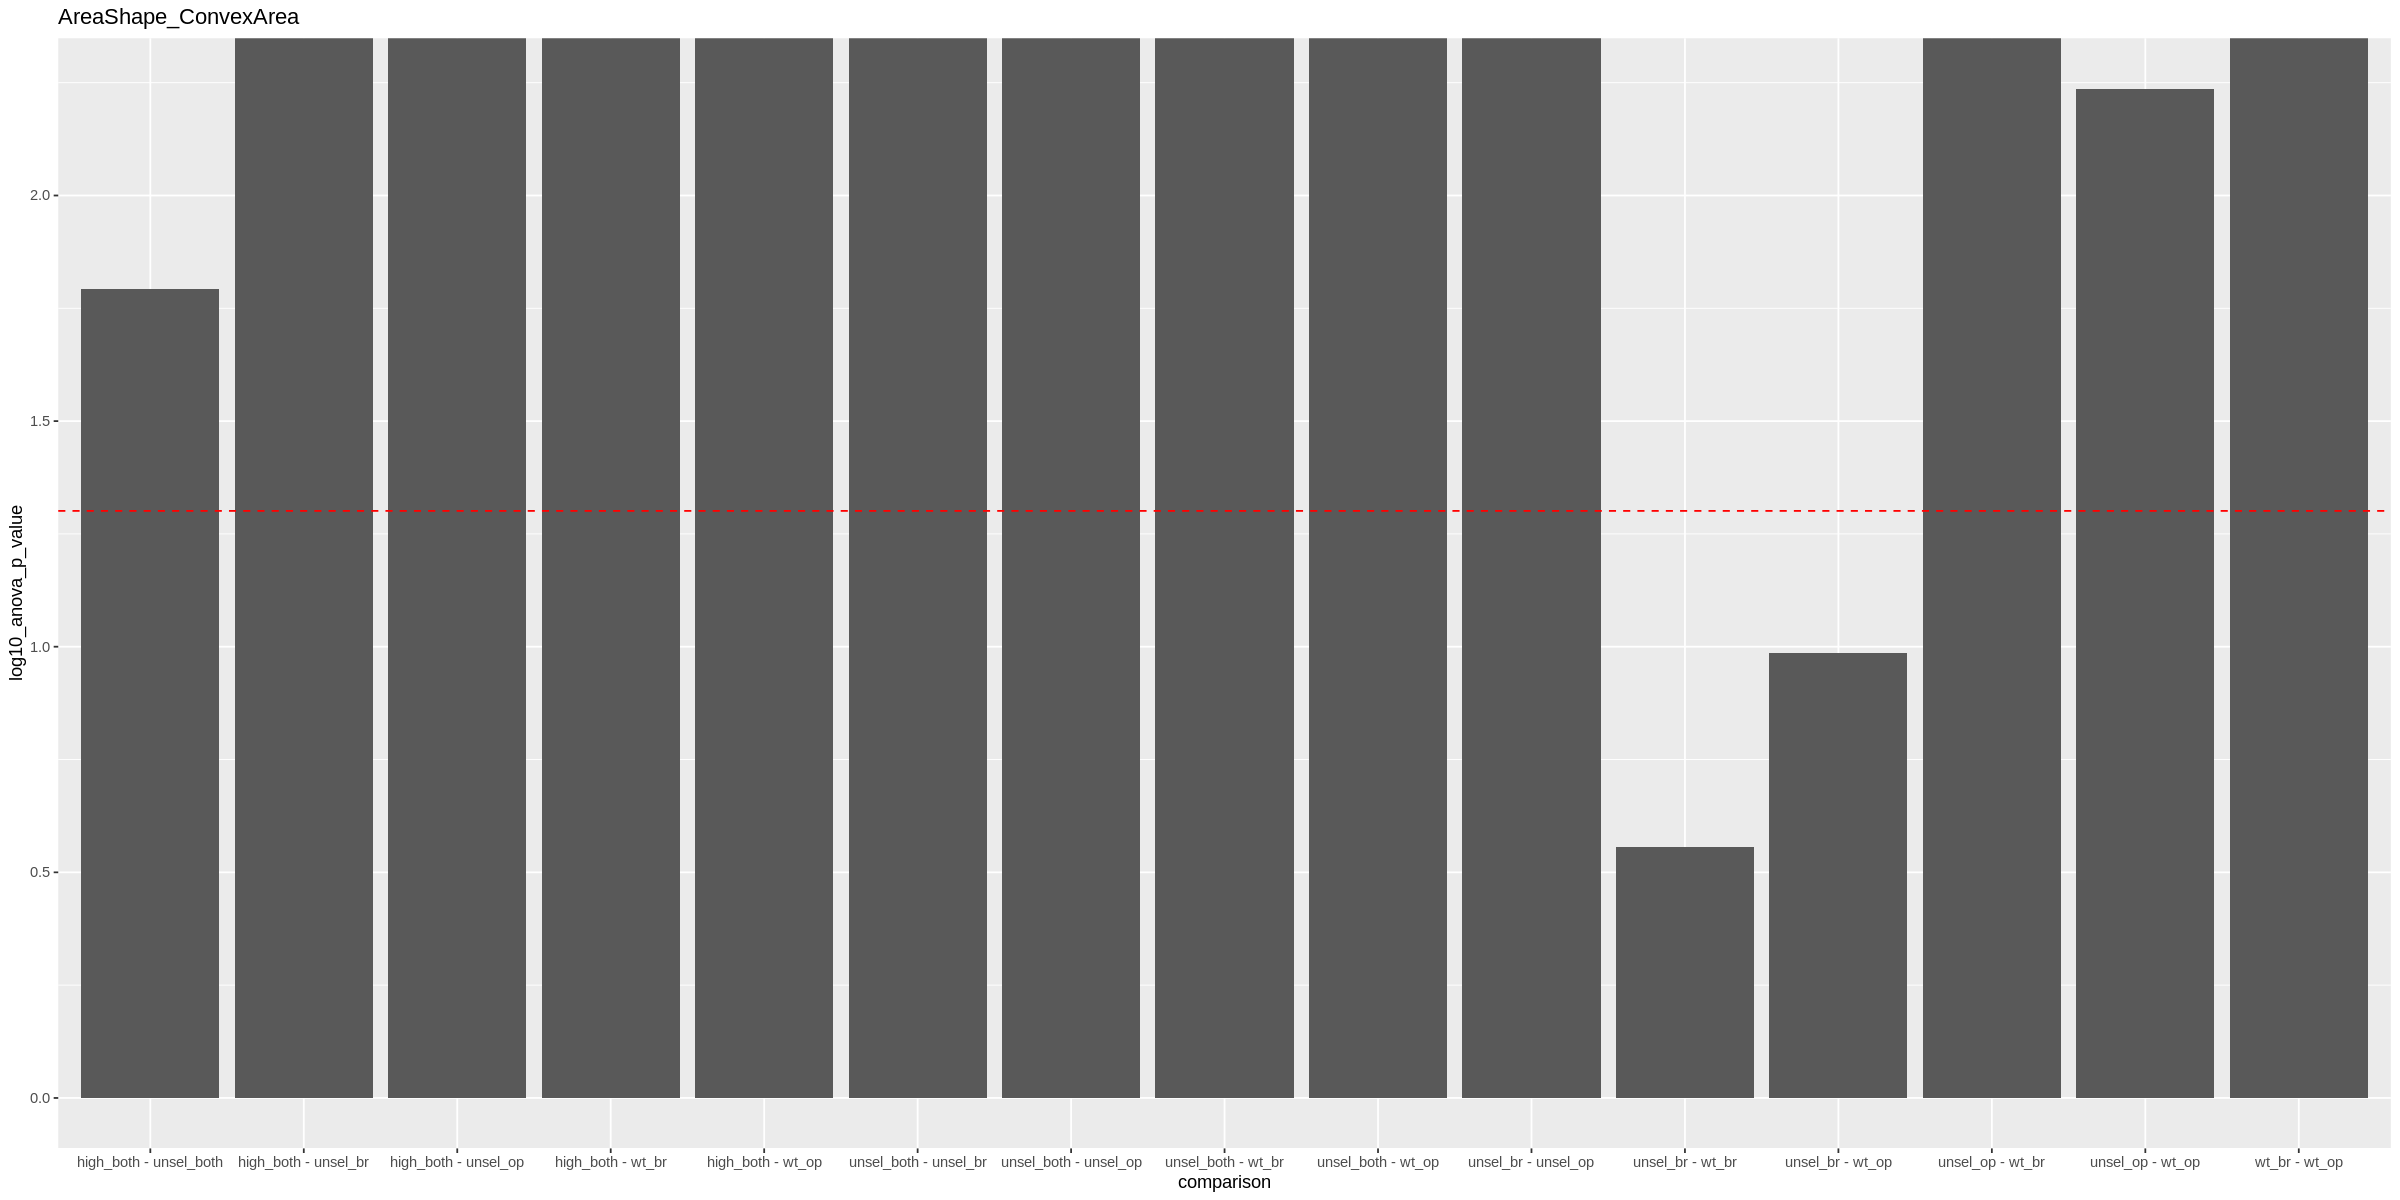

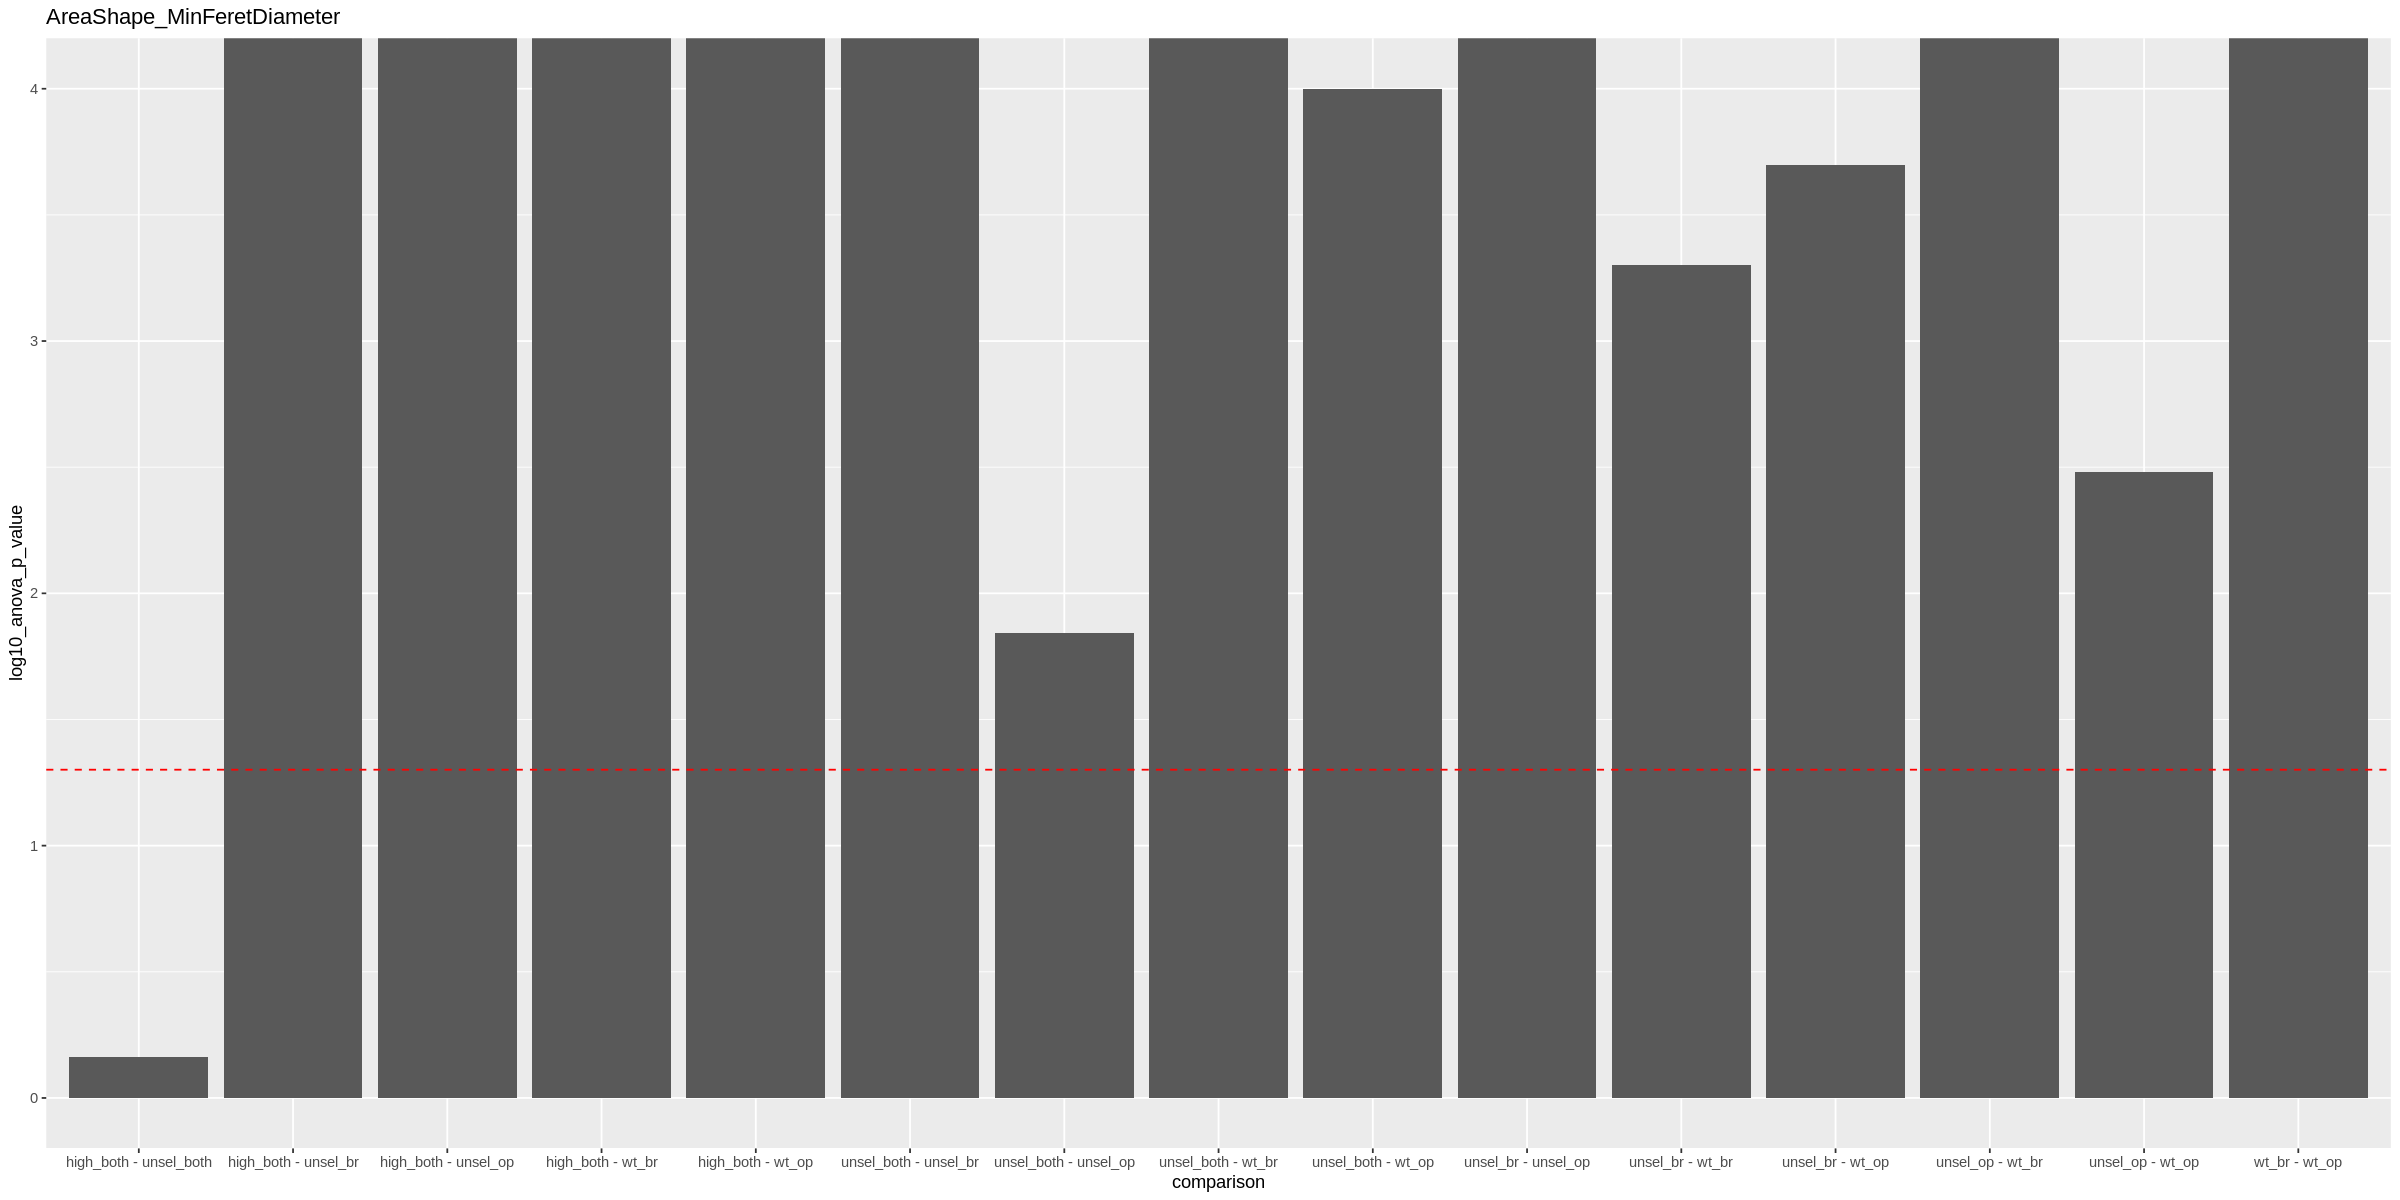

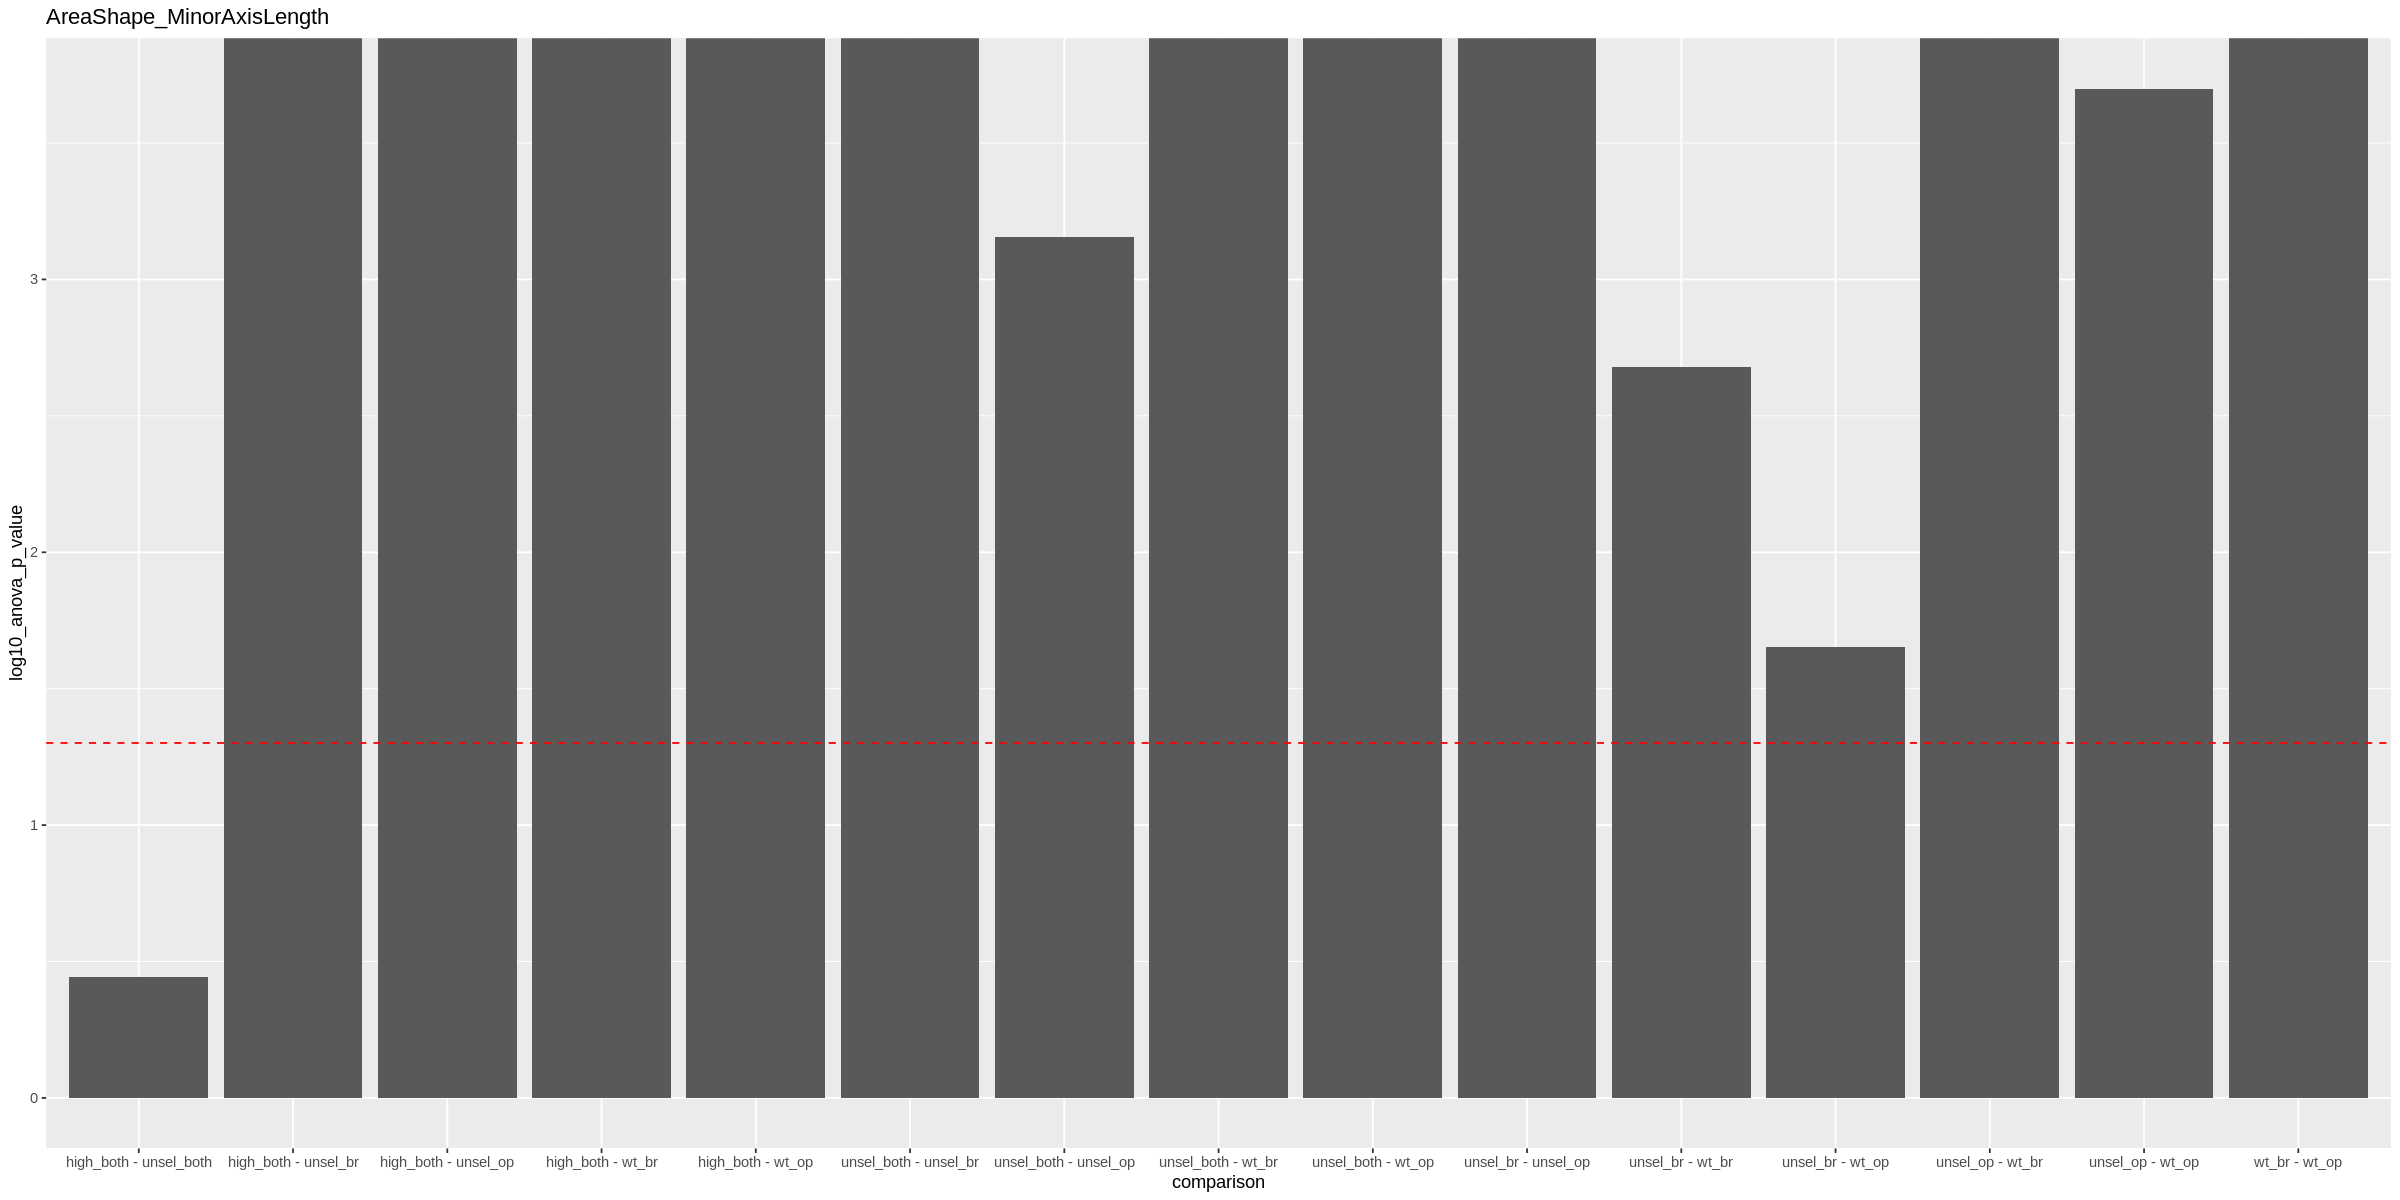

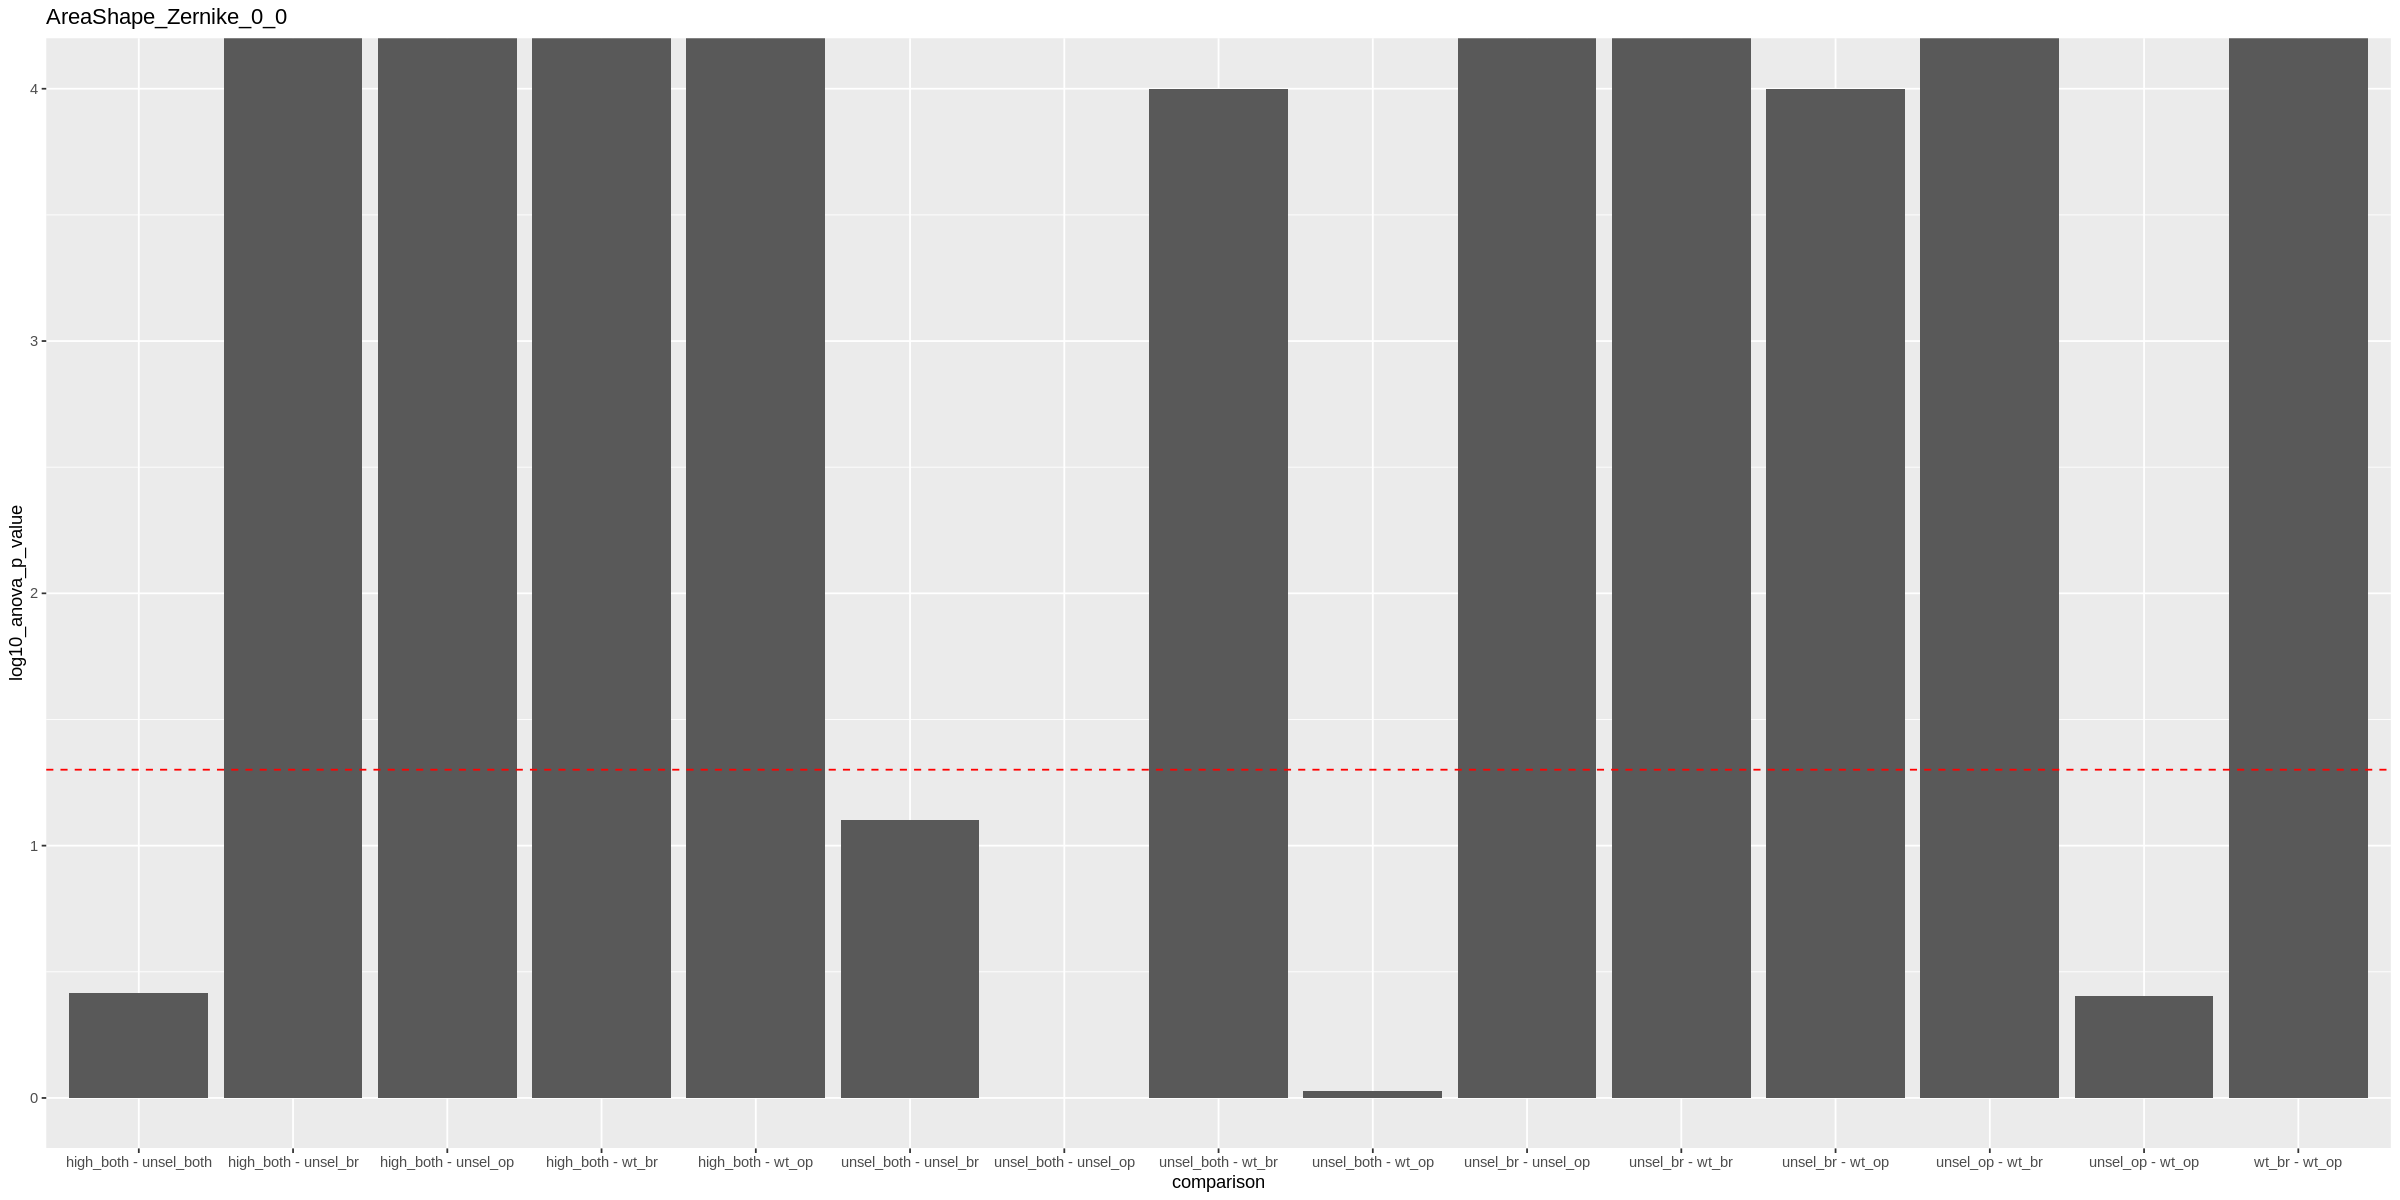

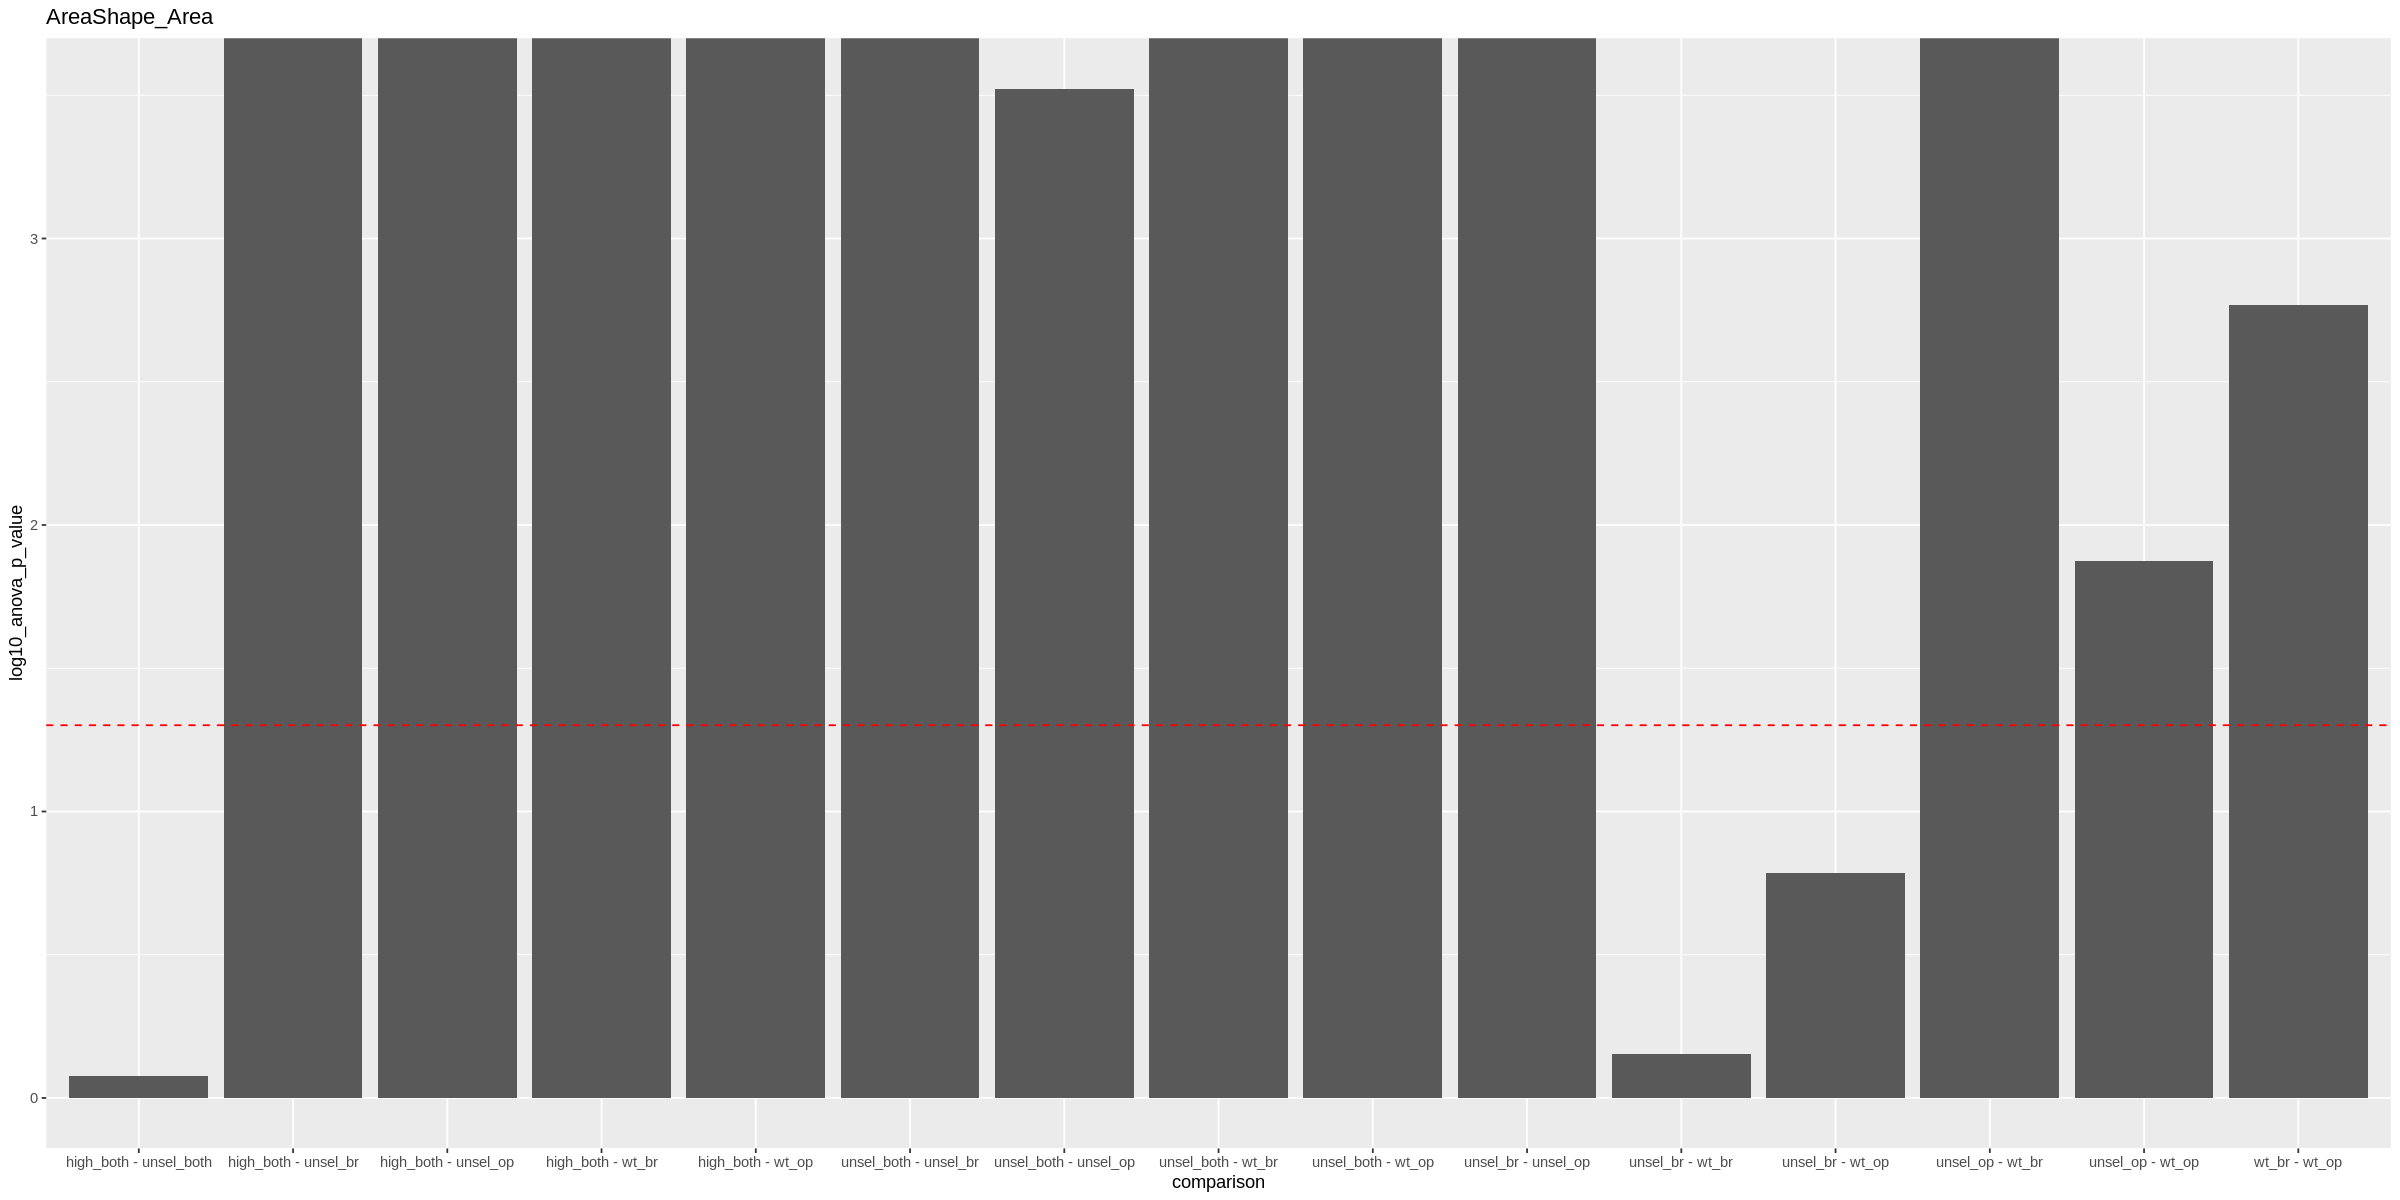

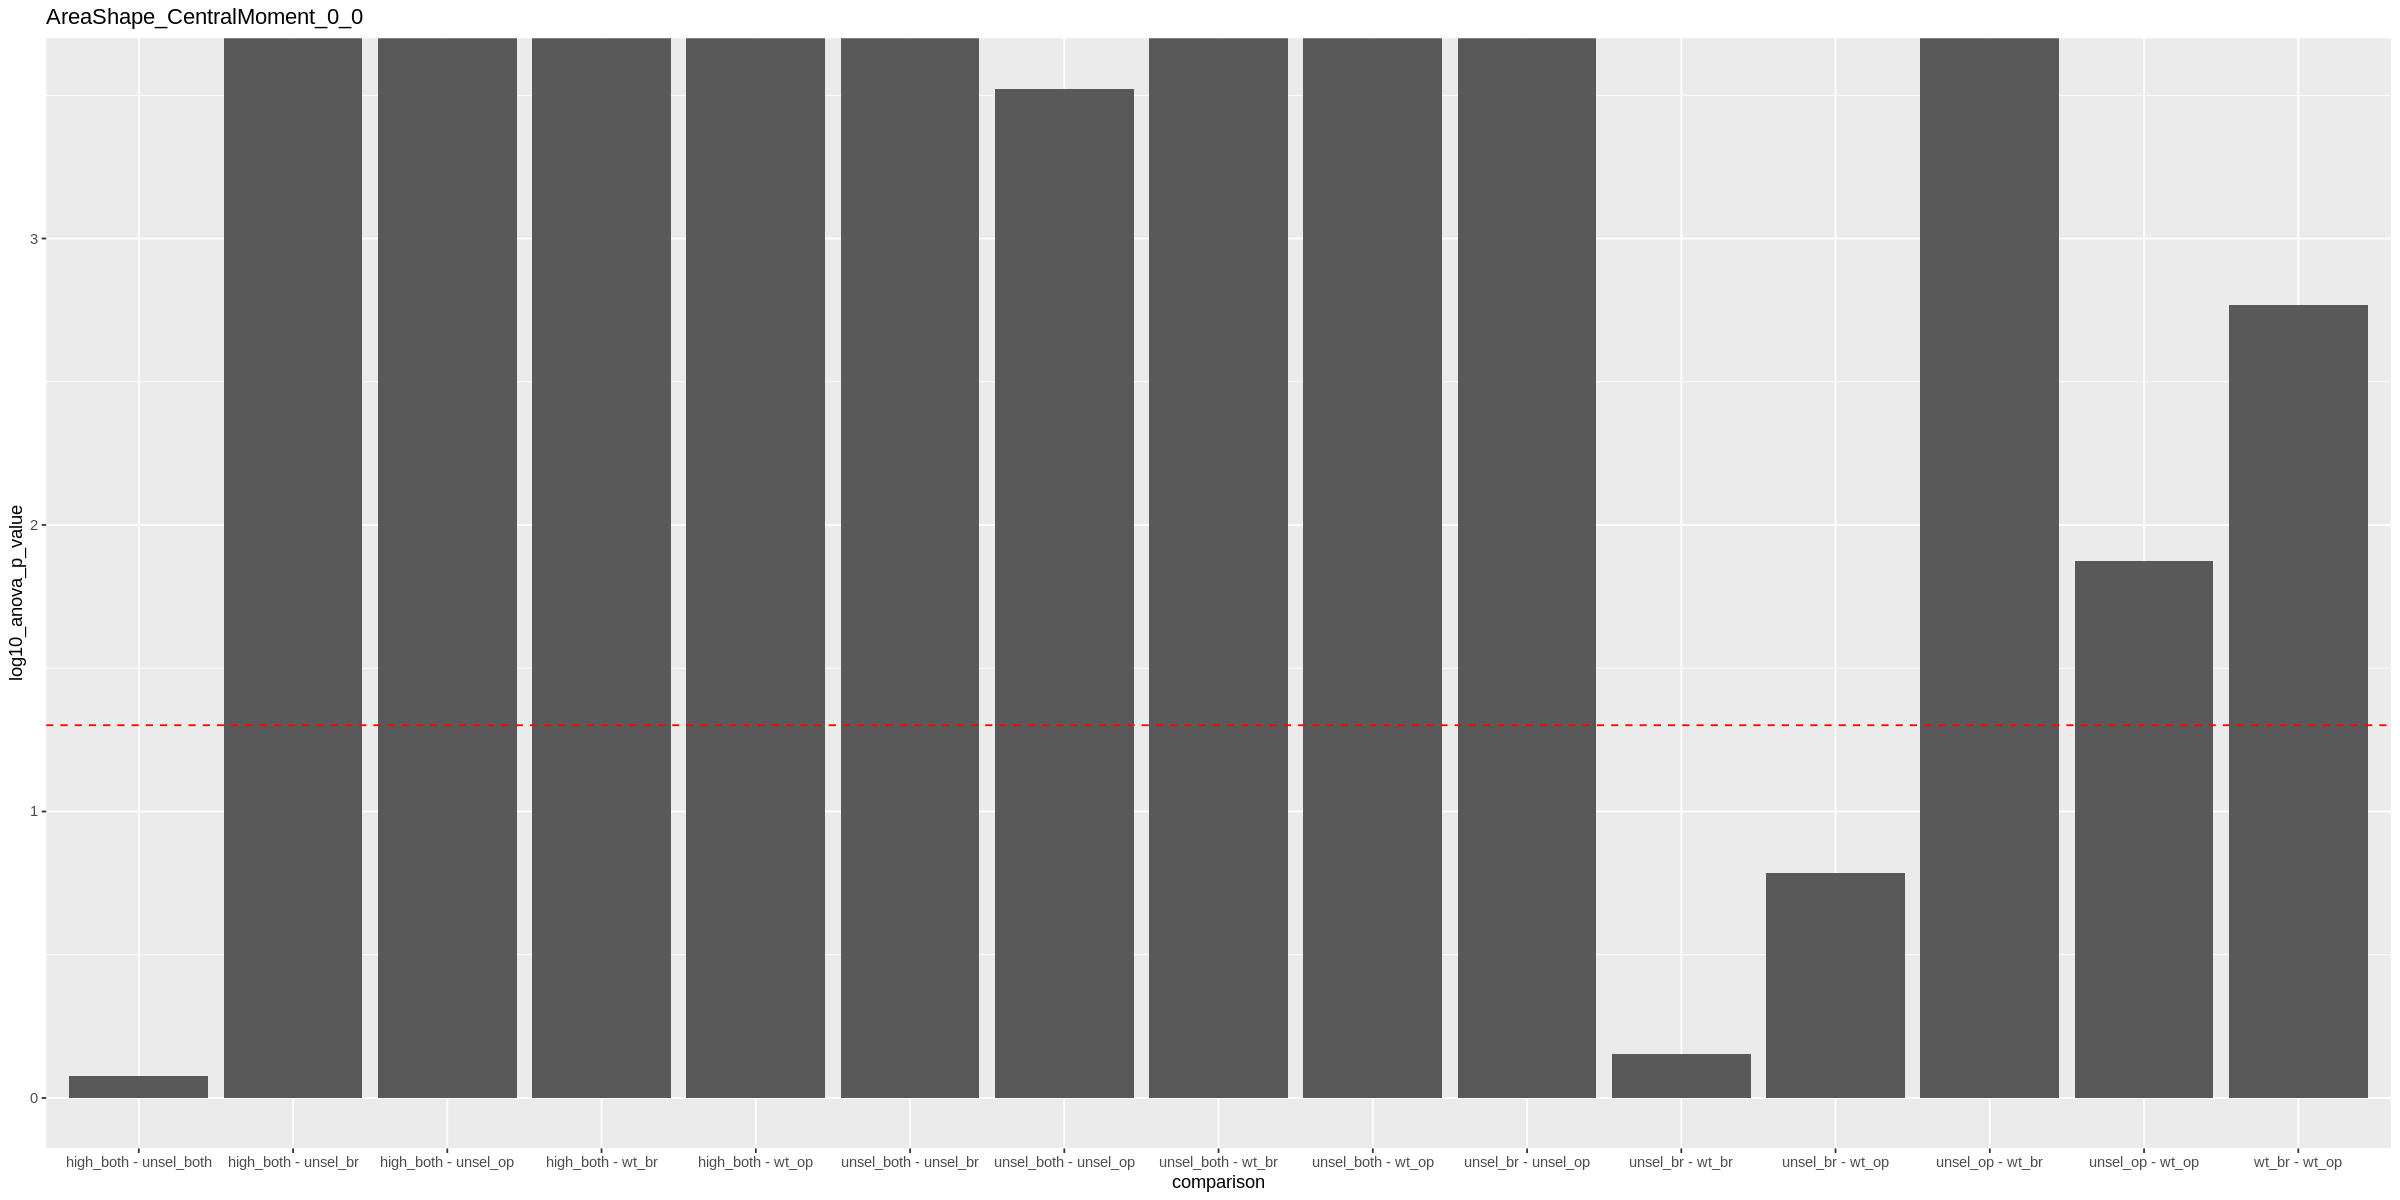

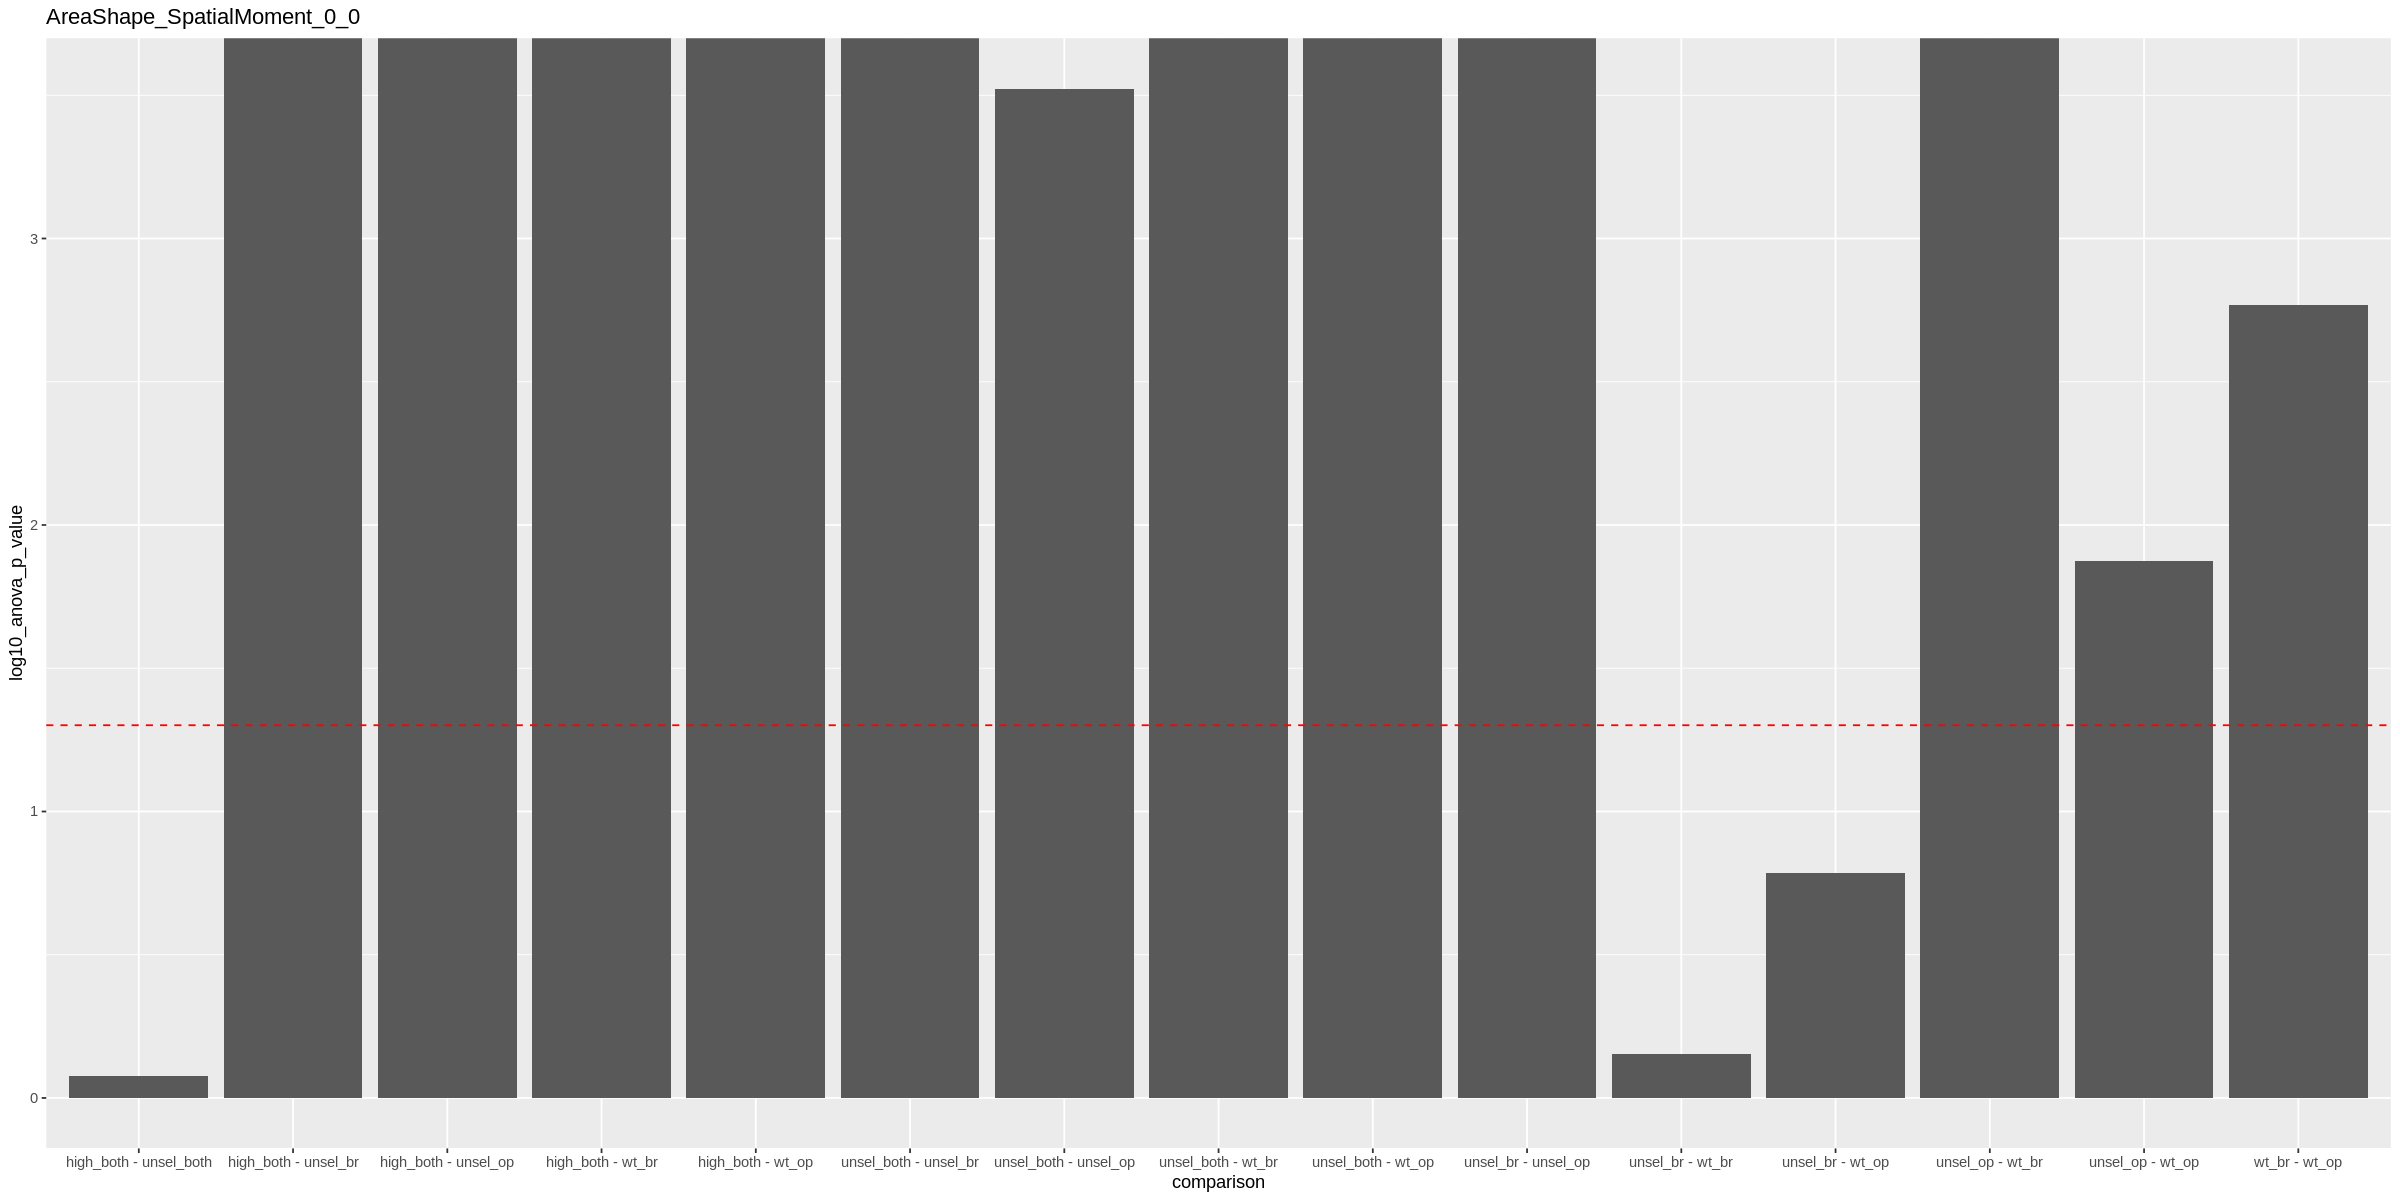

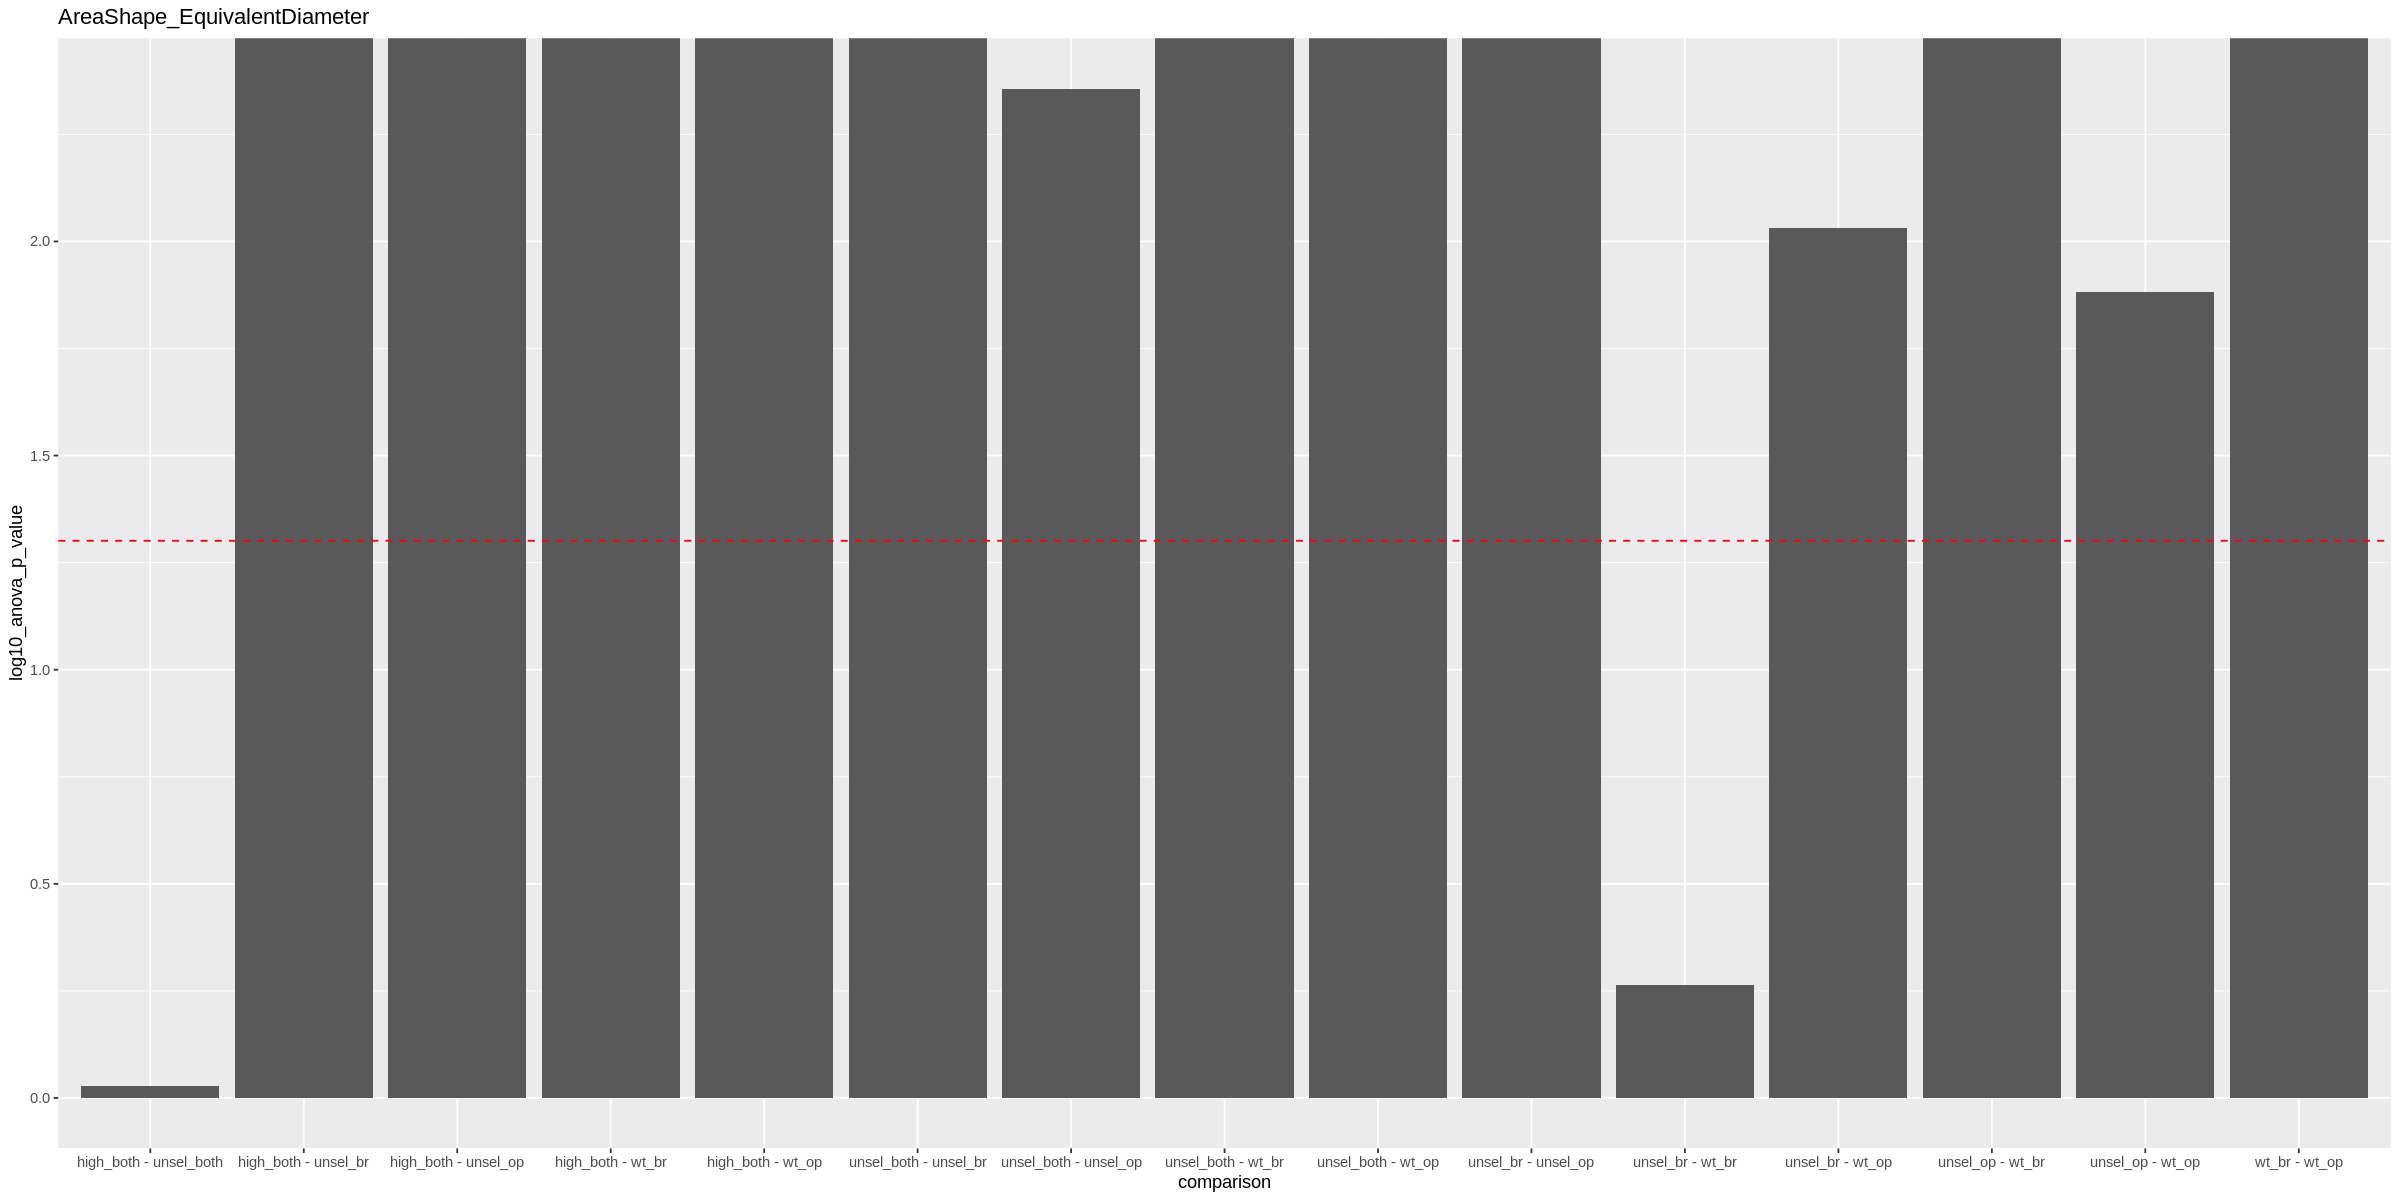

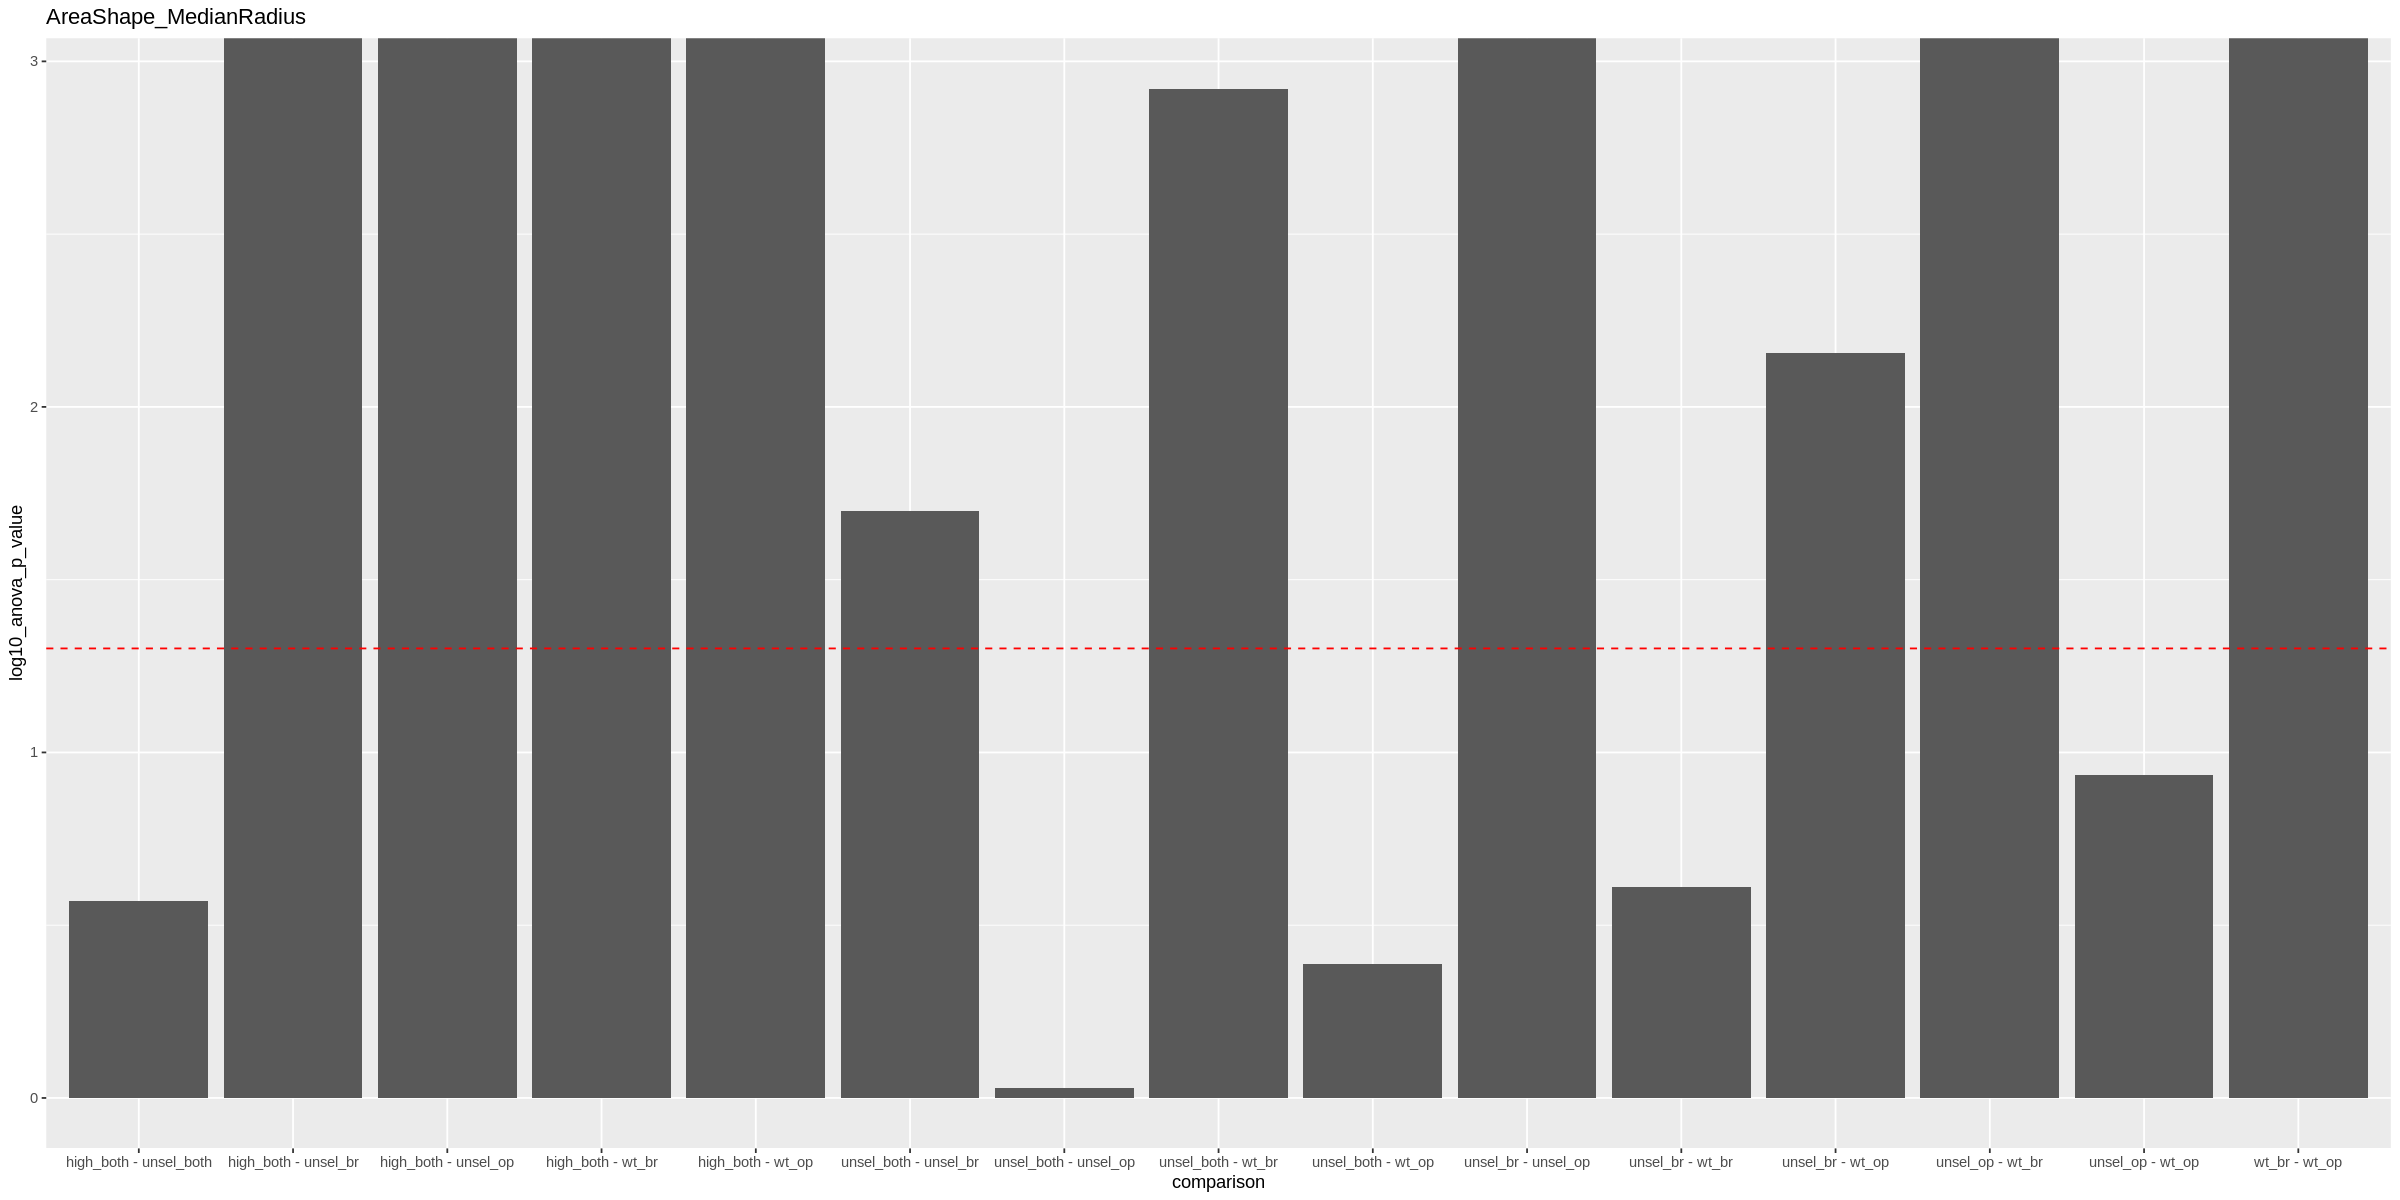

group1,group2,meandiff,p-adj,lower,upper,reject,feature,anova_p_value,comparison,log10_anova_p_value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<chr>,<dbl>
high_both,unsel_both,-0.7824,0.3651,-1.9310,0.3663,FALSE,AreaShape_Zernike_2_0,3.967931e-34,high_both - unsel_both,0.4375882
high_both,unsel_br,-2.0169,0.0000,-2.4487,-1.5850,TRUE,AreaShape_Zernike_2_0,3.967931e-34,high_both - unsel_br,Inf
high_both,unsel_op,-1.3178,0.0000,-1.7497,-0.8860,TRUE,AreaShape_Zernike_2_0,3.967931e-34,high_both - unsel_op,Inf
high_both,wt_br,-2.4569,0.0000,-2.8764,-2.0375,TRUE,AreaShape_Zernike_2_0,3.967931e-34,high_both - wt_br,Inf
high_both,wt_op,-1.6548,0.0000,-2.0742,-1.2353,TRUE,AreaShape_Zernike_2_0,3.967931e-34,high_both - wt_op,Inf
unsel_both,unsel_br,-1.2345,0.0284,-2.3878,-0.0812,TRUE,AreaShape_Zernike_2_0,3.967931e-34,unsel_both - unsel_br,1.5466817
unsel_both,unsel_op,-0.5355,0.7604,-1.6887,0.6178,FALSE,AreaShape_Zernike_2_0,3.967931e-34,unsel_both - unsel_op,0.1189579
unsel_both,wt_br,-1.6746,0.0006,-2.8232,-0.5259,TRUE,AreaShape_Zernike_2_0,3.967931e-34,unsel_both - wt_br,3.2218487
unsel_both,wt_op,-0.8724,0.2463,-2.0211,0.2763,FALSE,AreaShape_Zernike_2_0,3.967931e-34,unsel_both - wt_op,0.6085356


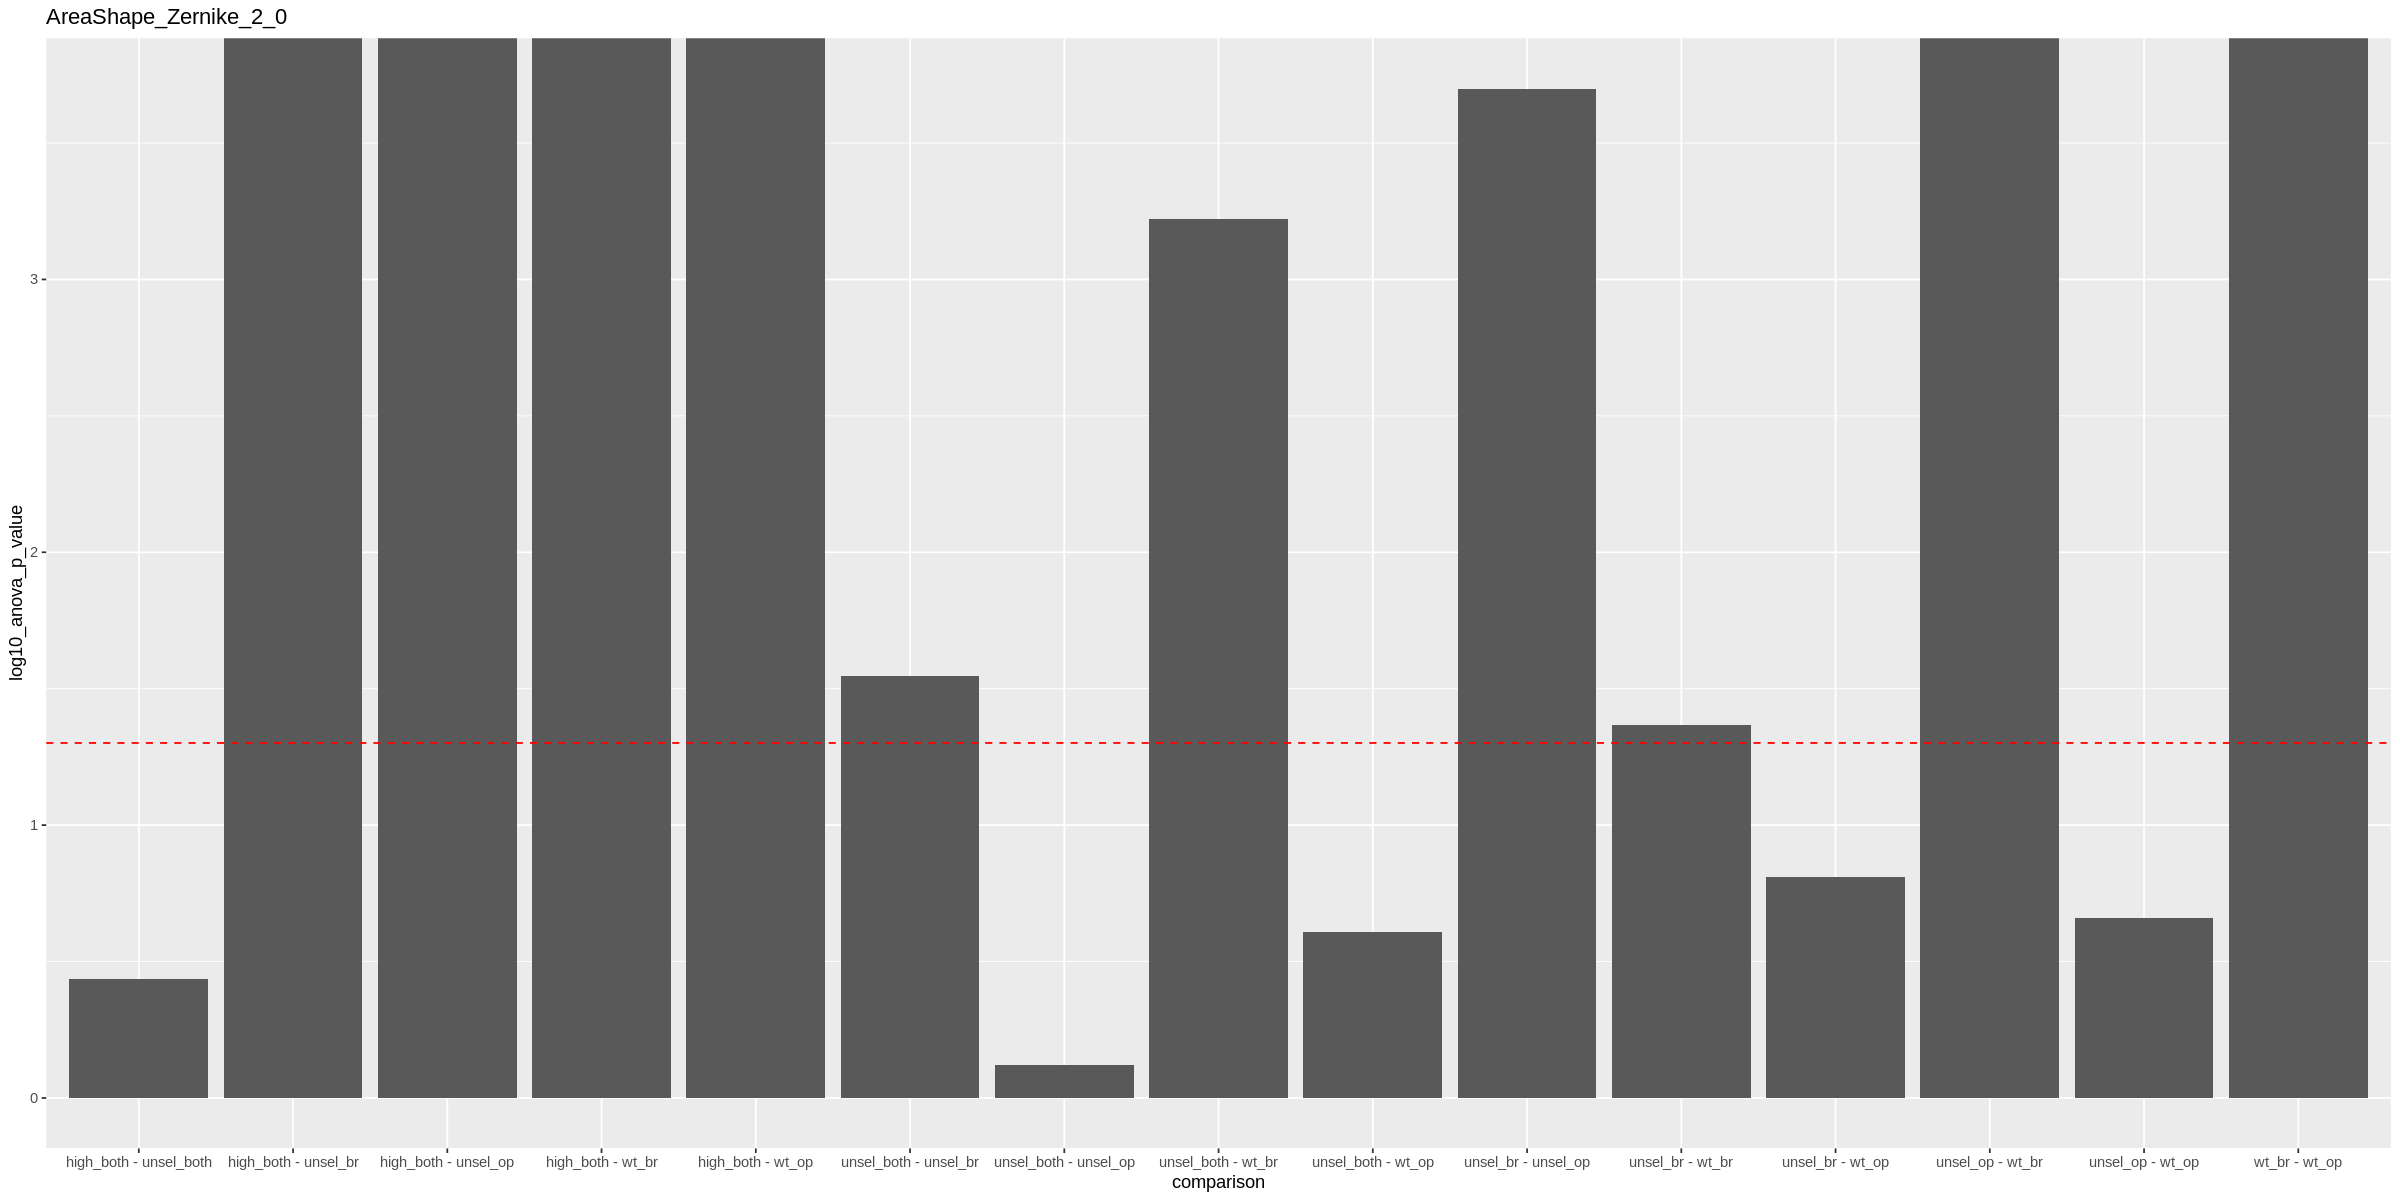

In [10]:
width <- 20
height <- 10
options(repr.plot.width = width, repr.plot.height = height)
for (i in features) {
    tmp <- top_10_anova_df %>% filter(feature == i)
    plot <- (
        ggplot(tmp, aes(x = comparison, y = log10_anova_p_value))
        + geom_bar(stat = "identity")
        + geom_hline(yintercept = -log10(0.05), linetype = "dashed", color = "red")
        + labs(title = i)
    )
    print(plot)
}
tmp